<a href="https://colab.research.google.com/github/Luna-luv/Kaggle_Study/blob/main/airplane%20passenger%20satisfaction/Airplane_Passenger_Satisfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Data


## 필요 라이브러리 호출

> `pd.set_option('display.max_columns', None)` : 파이썬이 디폴트로 보여주는 열은 20개. 이를 초과할 시 해당 코드 사용


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('display.max_columns', None)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

!pip install scikit-plot
!pip install scipy==1.9.3
import scikitplot #colab에서는 설치 후 호출해야함

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/airline passenger satisfaction/train.csv')
test_data=pd.read_csv('/content/drive/MyDrive/airline passenger satisfaction/test.csv')

In [ ]:
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


## 변수 drop
> `axis = 1` : 해당 열 drop
> `axis = 0` : 해당 행 drop

> `inplace = True` : 이를 적용한 새 데이터셋을 만들지 말고 기존 데이터셋에서 처리하란 의미.
```
굳이 test = test.drop 을 안해도 된다!
```

In [ ]:
data.drop(['Unnamed: 0', 'id'], axis = 1, inplace = True)
test_data.drop(['Unnamed: 0', 'id'], axis = 1, inplace = True)

## print(f) vs print
> print(f) 는 문자와 함께 프린트를 가능하게 함.(출력 시 설명하고 싶을 때, 문자 사이에 결과값 넣고 싶을 때 용이)
---
> ### print(f) 이전에는 어떻게 구현? >>>'%'을 이용해서
> print("Number of rows in training data : %", data.shape[0])



In [ ]:
print(f"Number of rows in training data : {data.shape[0]}")
print(f"Number of rows in test data : {test_data.shape[0]}")

print(data.shape[0])
print(test_data.shape[0])

Number of rows in training data : 103904
Number of rows in test data : 25976
103904
25976


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [ ]:
data.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


```
필자의 메모
- Average departure delay: 14 Minutes
- Average arrival delay: 15 Minutes
- Inflight wifi service has the lowest rating(average) out of 5 (2.72)
```

## categorical columns temporary
> 범주형 변수만 따로 묶은 후 일시적으로 object type로 전환 -> python 은 integer type이어도 categorical 로 잘 인식하지만, object으로 바꾼 경우 필자의 개인 의도가 담겨있을 수 있음.
- GPT曰 : 현재 필자는 KNN 모델 사용을 위해 데이터 처리 중. `LightGBM`, `XGBoost` 같은 모델은 정수형 변수도 수치적 의미가 없는 경우 범주형으로 처리해서 큰 오류가 없으나, **`KNN`은 거리 기반 알고리즘이라 변수 간 거리를 계산해서 이를 방지하기 위해 바꿔주는게 좋음.**
```
근데 리뷰 점수는 등간 척도인데 상관없는거 아닌가????싶음...
```


In [ ]:
cat_cols_temp = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']

In [ ]:
data[cat_cols_temp] = data[cat_cols_temp].astype(object)

# Exploratory Data Analysis

In [ ]:
cat_columns = data.select_dtypes(object).columns.to_list()
print(cat_columns)
print() #왜 있나 했더니 한 칸 띄어쓰기 용도
num_columns=data.select_dtypes(np.number).columns.to_list()
print(num_columns)

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction']

['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


## Univariate Analysis

In [ ]:
sample_data = data.sample(1000)

>`sns.set_context()` : 글자 크기, 선 굵기, 마커 크기 등으로 조정해서 **시각화 목적**에 맞는 스타일을 적용
- notebook이 colab, jupyter 최적화

|context 값|사용 목적|특징|
|----------|---------|----|
|paper|논문, 인쇄용|작고 단정함|
|notebook|Jupyter 노트북|기본값, 균형잡힘|
|talk|발표용 슬라이드|큼직하고 보기 쉬움|
|poster|학회 포스터|아주 큼, 시각 강조용|


```
모두 해 본 결과 가장 큰 차이는 크기로 보임. 폰트도 약간 다른데 크게 다르지 않은 느낌
(아래 4개의 코드 결과 참고)
```

>`fig, ax = plt.subplots(1, 2, figsize = (20, 5))`
- figure 는 전체 그래프 캔버스 역할
- axes 는 개별 그래프 의미(x축, y축, 제목, 데이터 등)
- 1, 2 : 1행 2열 그래프 -> ax[0], ax[1]로 각 열 접근 가
- figsize(20, 5) 는 가로 20인치, 세로 5인치의 그래프 크기를 의미

<ipython-input-46-abec402af3d4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = sample_data[col], ax = ax[1], palette = 'crest')
<ipython-input-46-abec402af3d4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = sample_data[col], ax = ax[1], palette = 'crest')
<ipython-input-46-abec402af3d4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = sample_data[col], ax = ax[1], palette = 'crest')
<ipython-input-46-abec402af3d4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assig

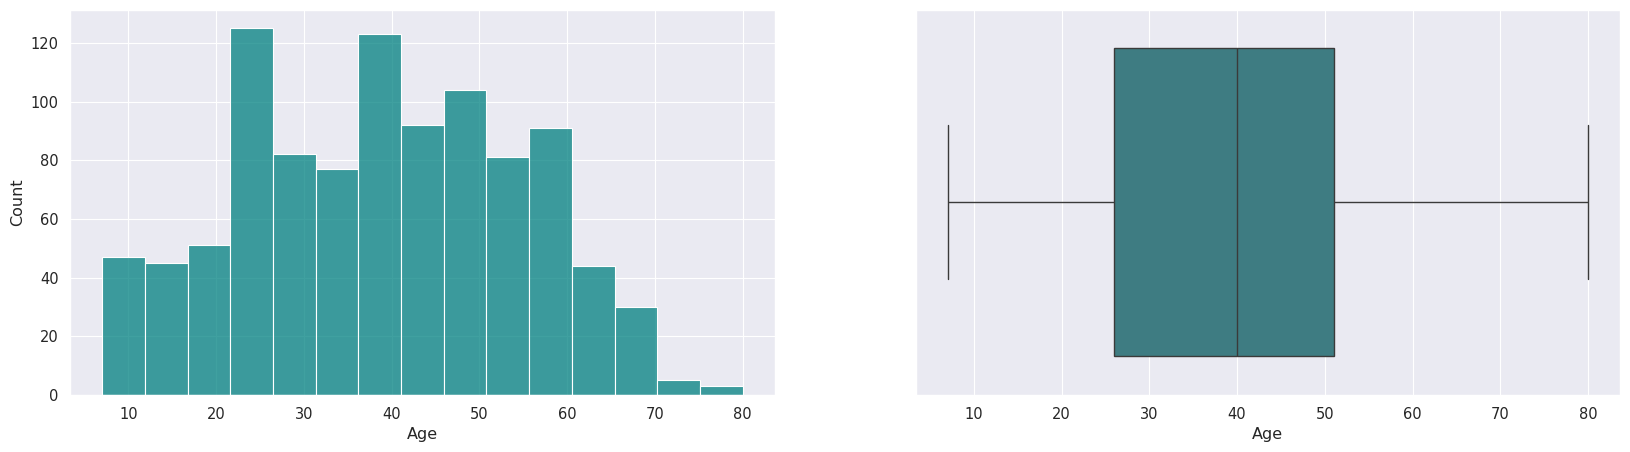

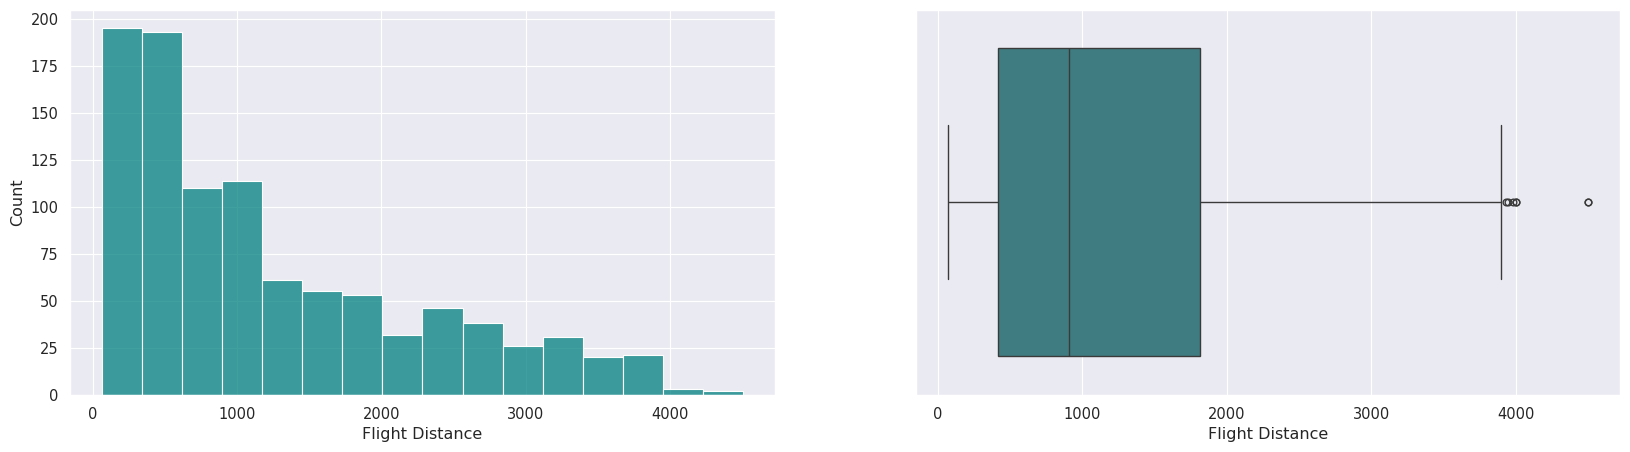

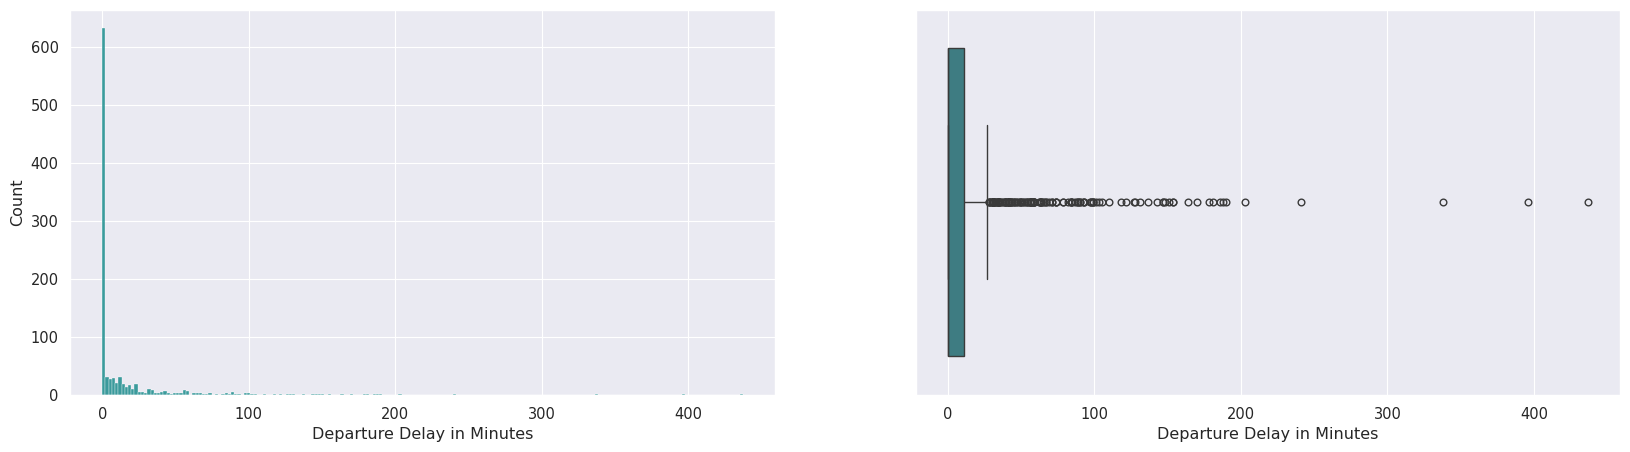

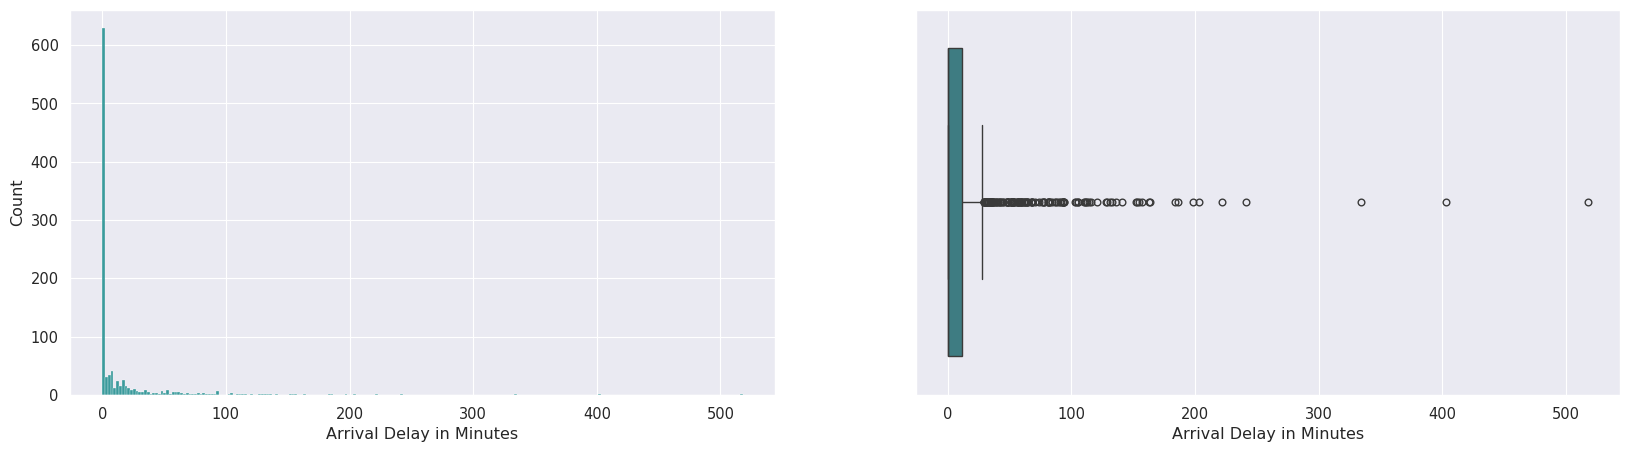

In [ ]:
sns.set_context('paper', font_scale = 1.2)
for col in num_columns :
  fig, ax = plt.subplots(1 ,2, figsize = (20, 5))
  sns.histplot(sample_data[col], ax=ax[0], color = 'teal')
  sns.boxplot(x = sample_data[col], ax = ax[1], palette = 'crest')

<ipython-input-47-ea4f8f4547bb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = sample_data[col], ax = ax[1], palette = 'crest')
<ipython-input-47-ea4f8f4547bb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = sample_data[col], ax = ax[1], palette = 'crest')
<ipython-input-47-ea4f8f4547bb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = sample_data[col], ax = ax[1], palette = 'crest')
<ipython-input-47-ea4f8f4547bb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assig

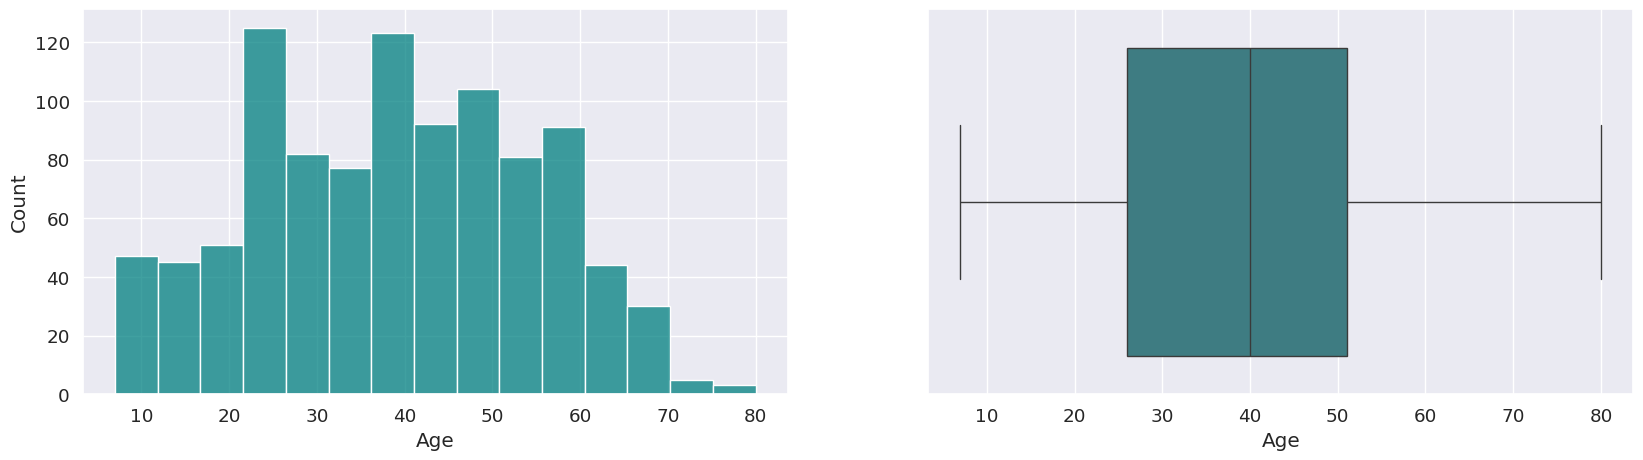

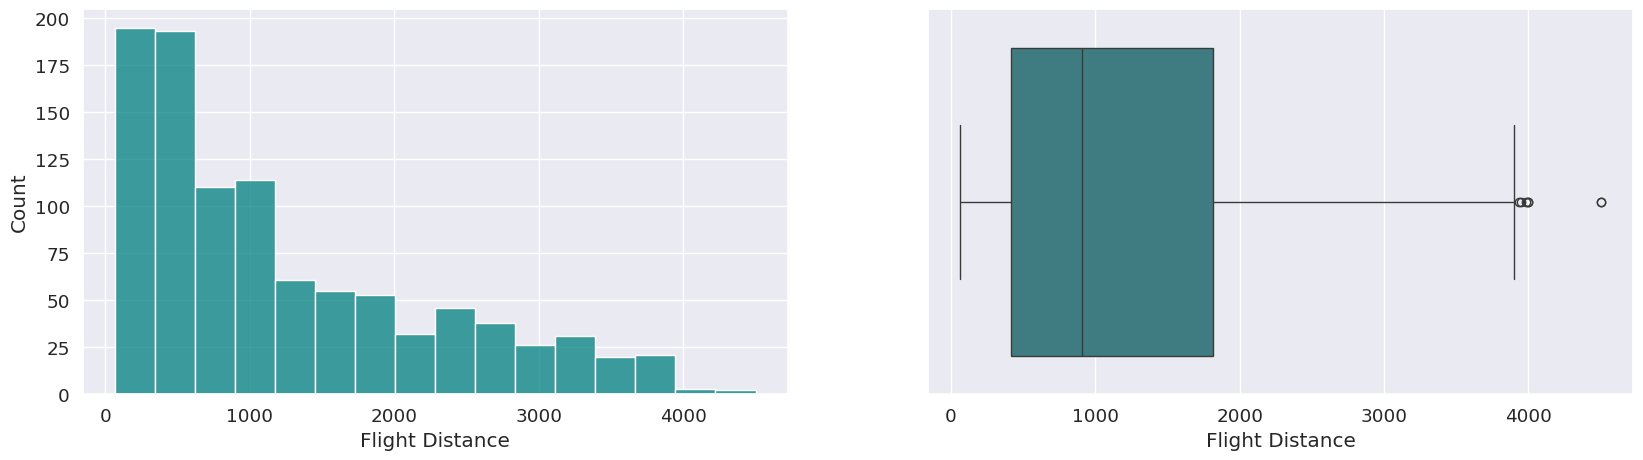

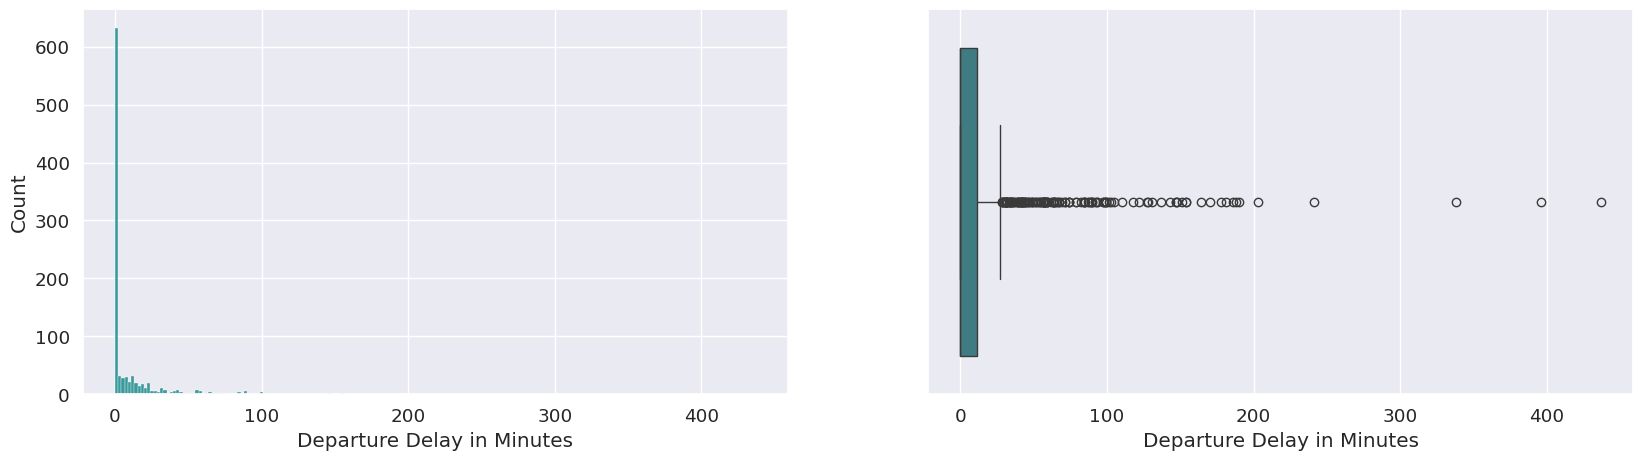

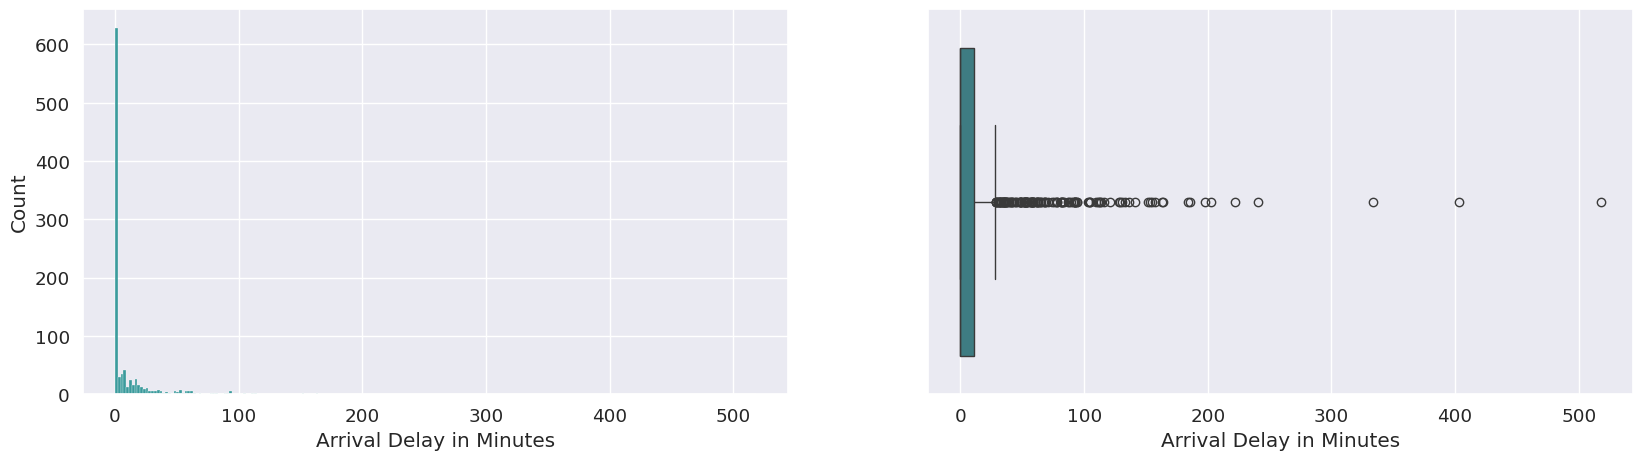

In [ ]:
# 필자의 코드
sns.set_context('notebook', font_scale = 1.2)
for col in num_columns :
  fig, ax = plt.subplots(1 ,2, figsize = (20, 5))
  sns.histplot(sample_data[col], ax=ax[0], color = 'teal')
  sns.boxplot(x = sample_data[col], ax = ax[1], palette = 'crest')

<ipython-input-48-c2f5a86c8ef9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = sample_data[col], ax = ax[1], palette = 'crest')
<ipython-input-48-c2f5a86c8ef9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = sample_data[col], ax = ax[1], palette = 'crest')
<ipython-input-48-c2f5a86c8ef9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = sample_data[col], ax = ax[1], palette = 'crest')
<ipython-input-48-c2f5a86c8ef9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assig

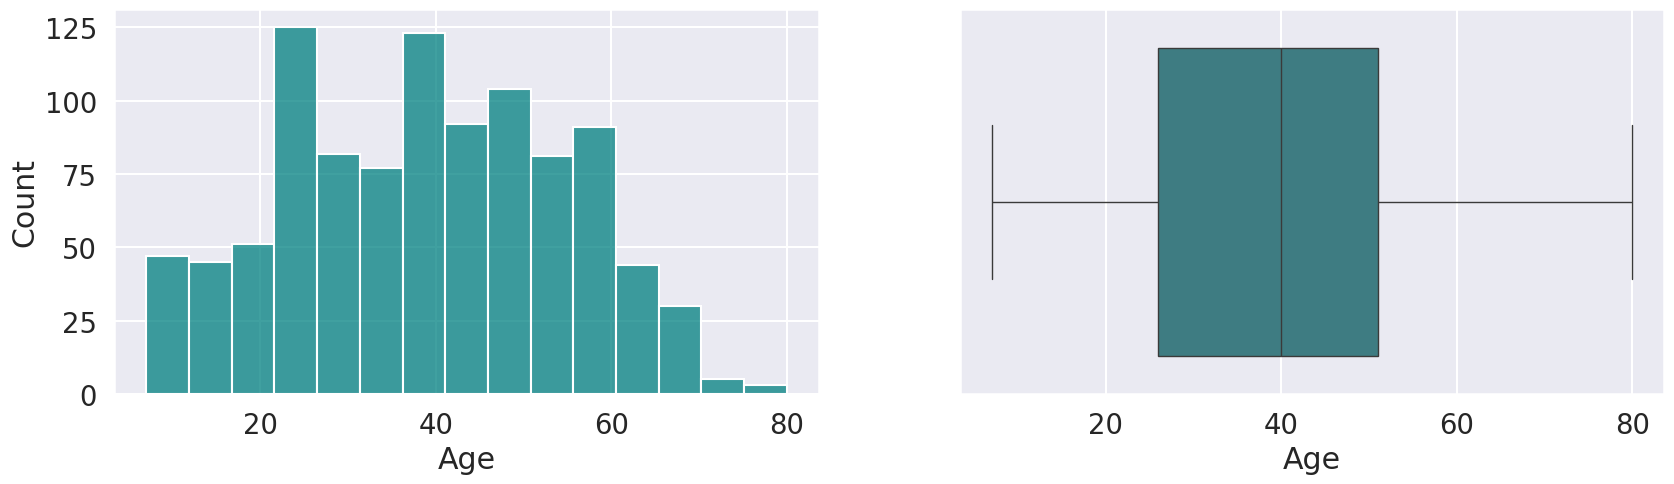

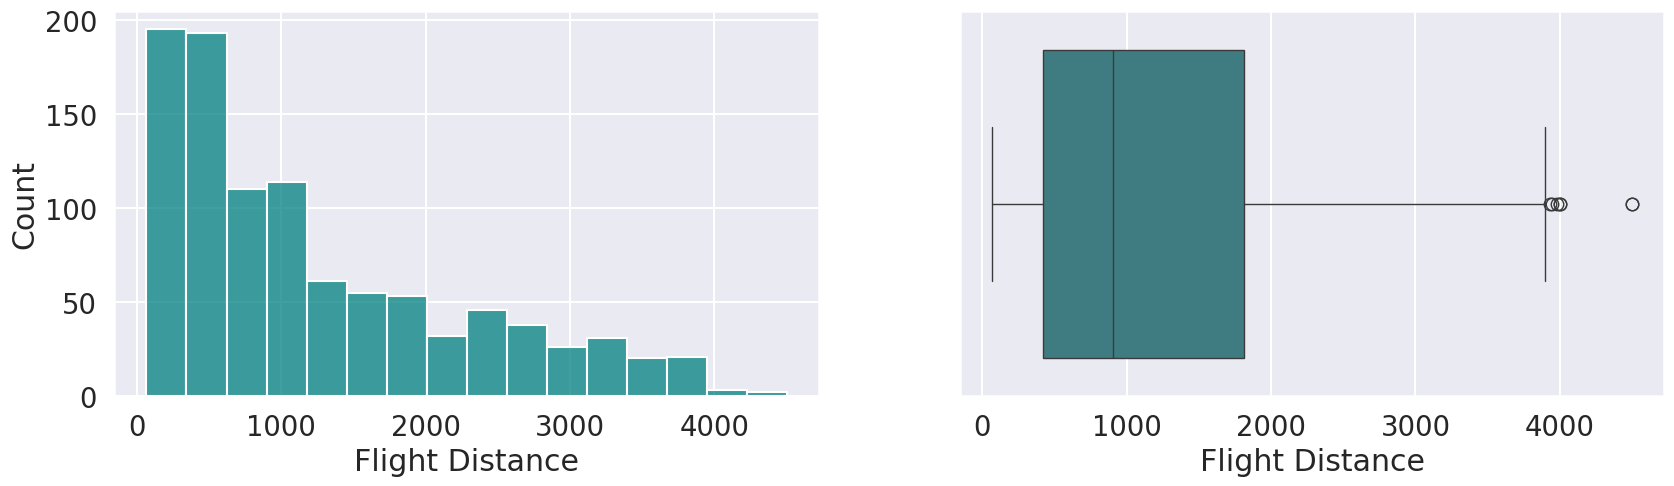

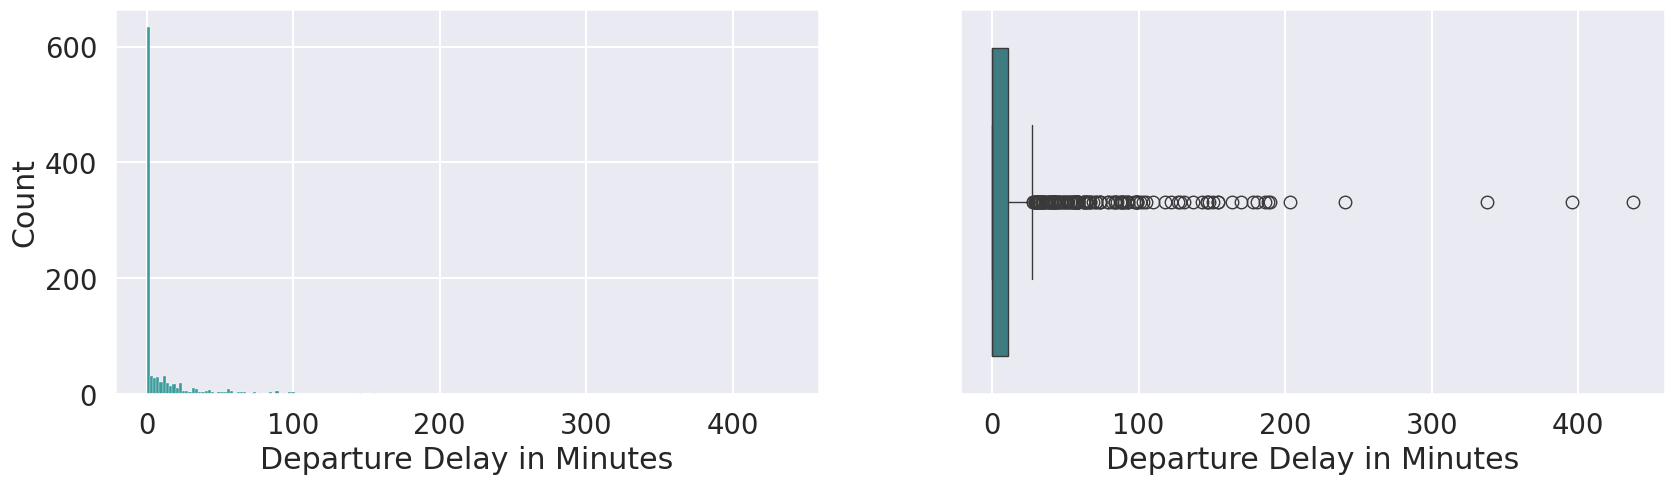

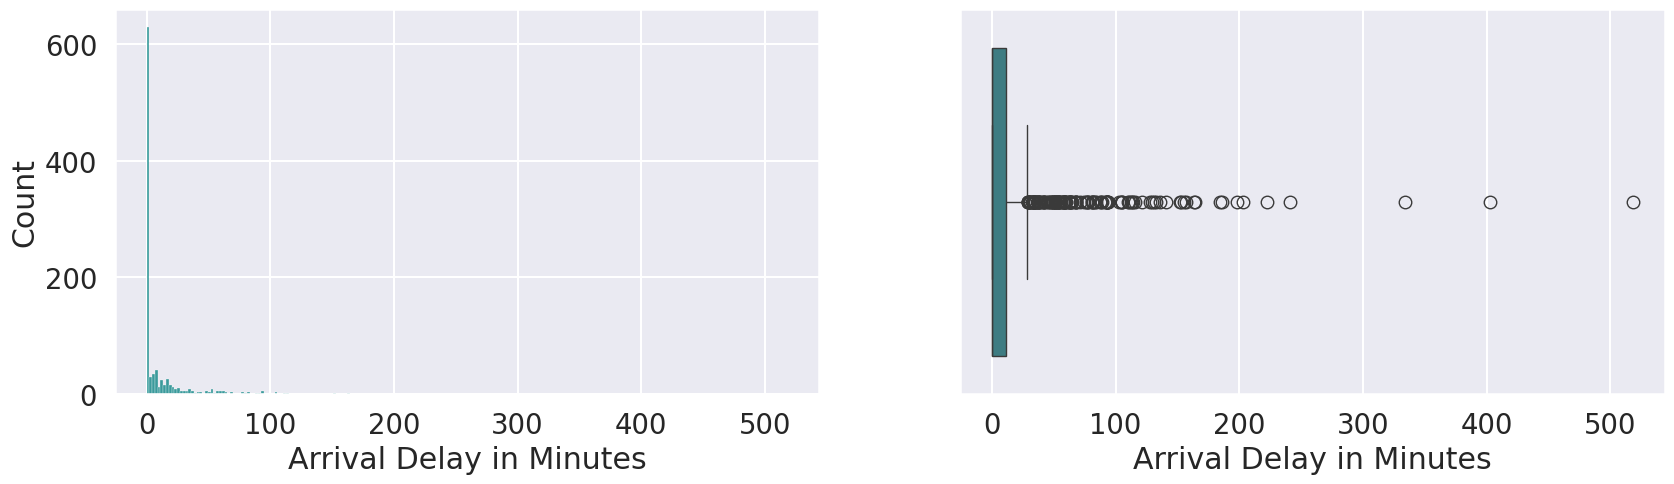

In [ ]:
sns.set_context('talk', font_scale = 1.2)
for col in num_columns :
  fig, ax = plt.subplots(1 ,2, figsize = (20, 5))
  sns.histplot(sample_data[col], ax=ax[0], color = 'teal')
  sns.boxplot(x = sample_data[col], ax = ax[1], palette = 'crest')

<ipython-input-49-c09f25c1f369>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = sample_data[col], ax = ax[1], palette = 'crest')
<ipython-input-49-c09f25c1f369>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = sample_data[col], ax = ax[1], palette = 'crest')
<ipython-input-49-c09f25c1f369>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = sample_data[col], ax = ax[1], palette = 'crest')
<ipython-input-49-c09f25c1f369>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assig

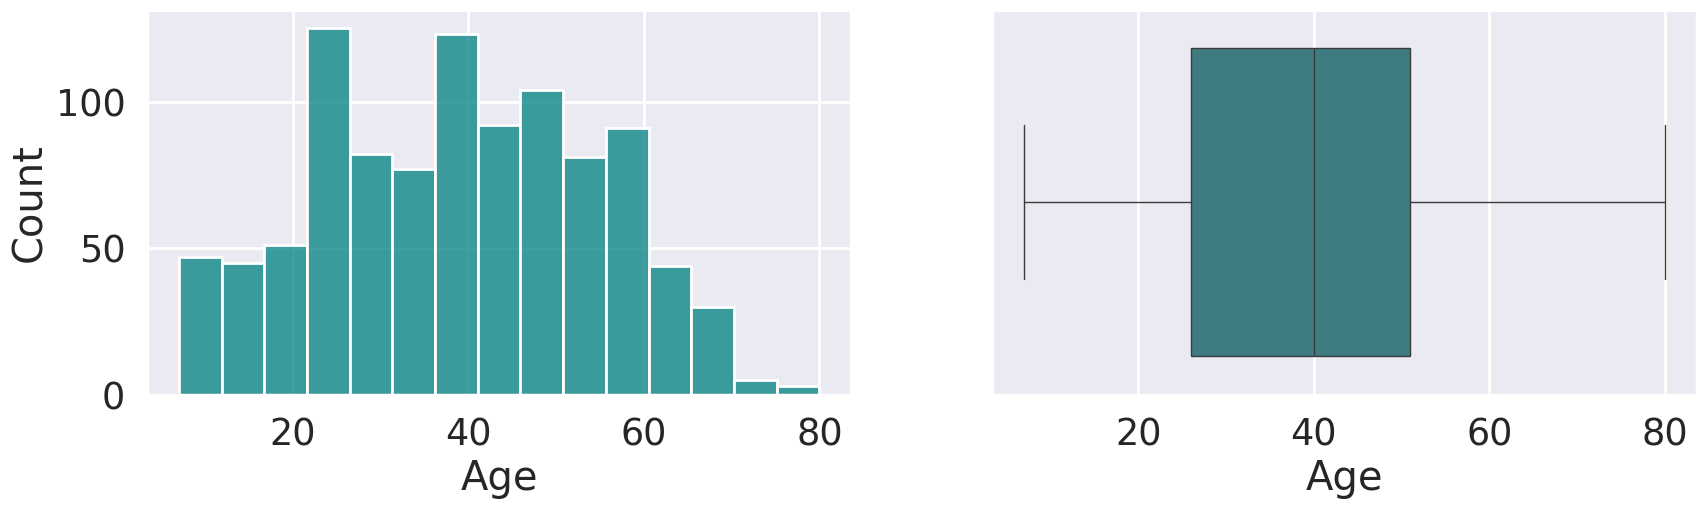

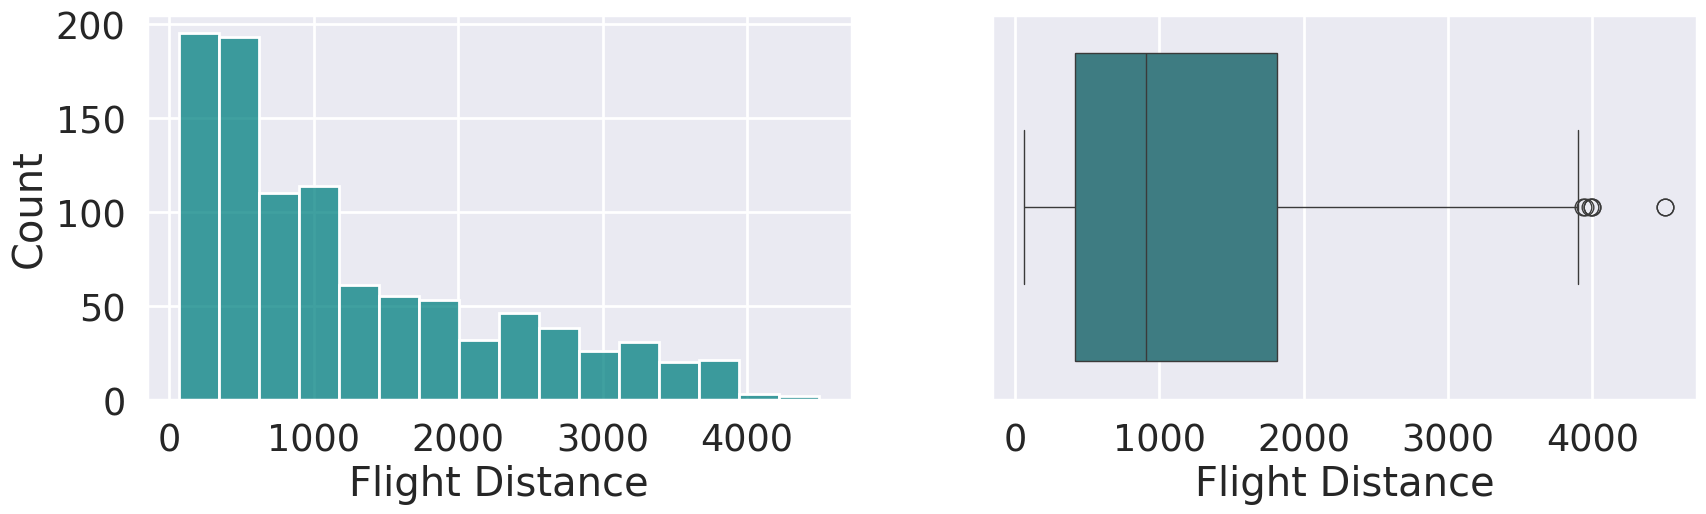

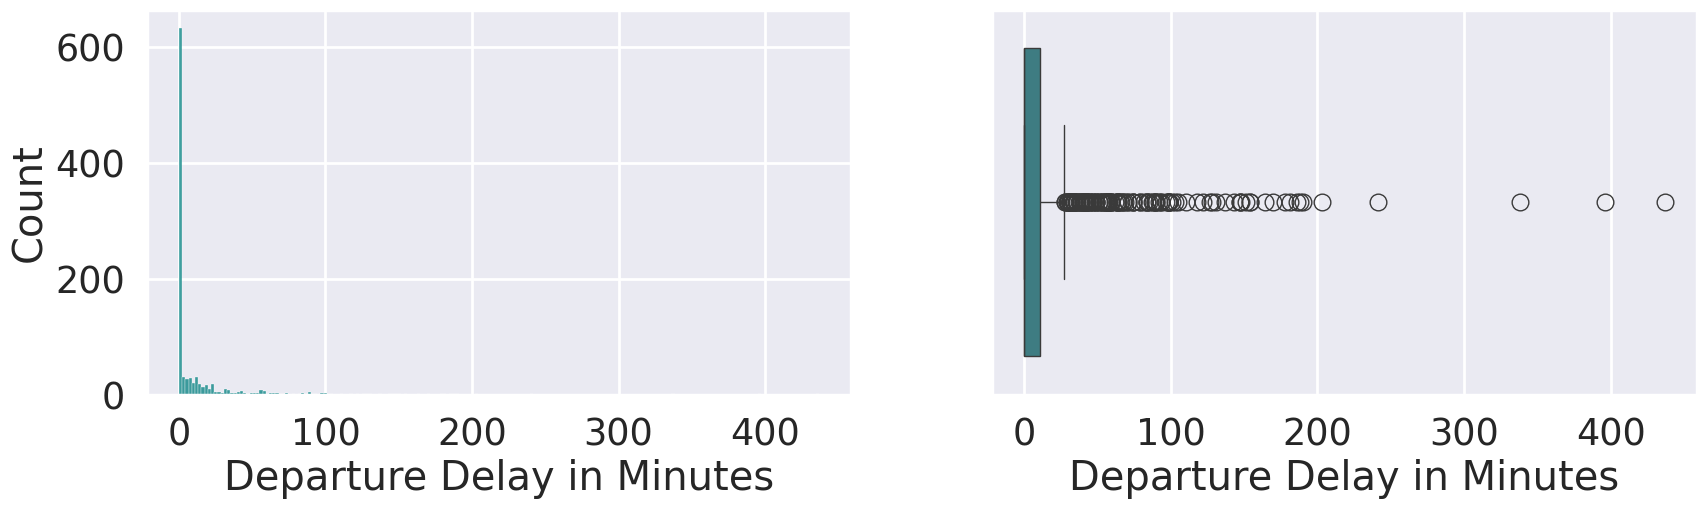

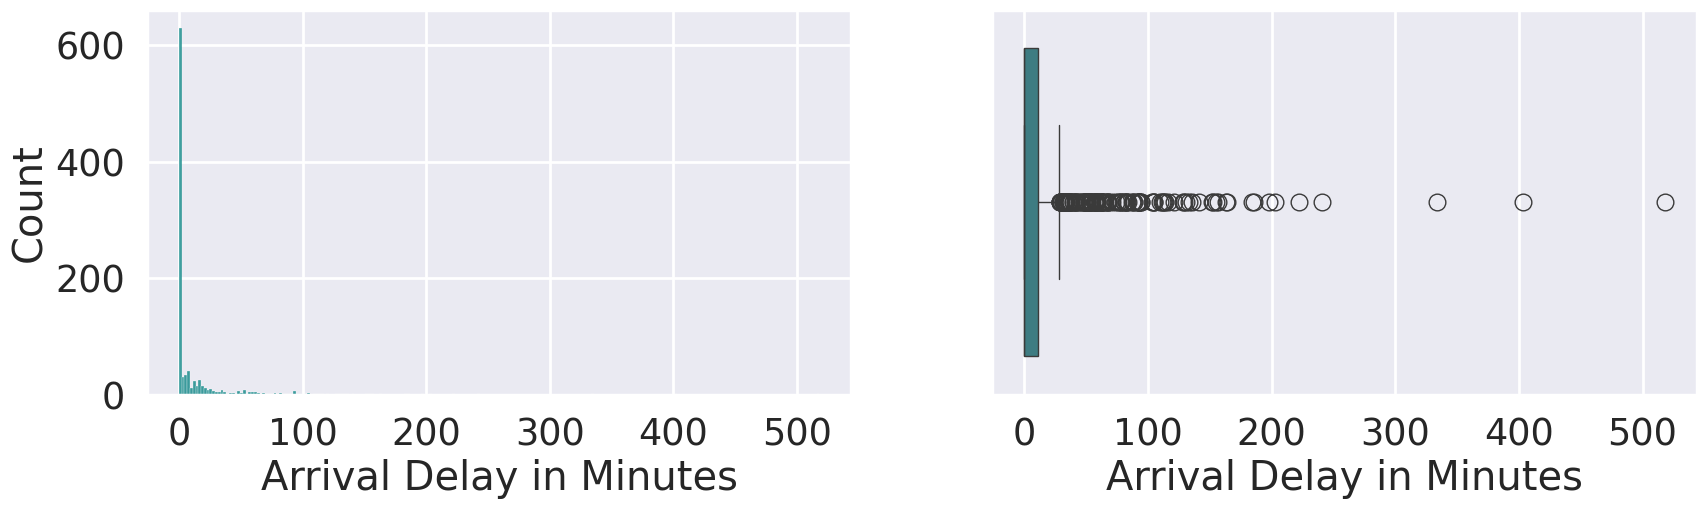

In [ ]:
sns.set_context('poster', font_scale = 1.2)
for col in num_columns :
  fig, ax = plt.subplots(1 ,2, figsize = (20, 5))
  sns.histplot(sample_data[col], ax=ax[0], color = 'teal')
  sns.boxplot(x = sample_data[col], ax = ax[1], palette = 'crest')

```
필자 曰
- Majority of the flights have no delay, therefore both the Departure delay and arrival delay distributions are heavily skewed.
- Majority of the flights have distance lesser than 1000 Km and only some have distance greater than 4000 Km


## 시각화 중 for문 사용 여부
> 필자 코드 : 각 [행, 열]에 변수 지정해서 시각화. 전부 적음

> 내 코드 : for 문을 이용해 코드 단순화
- `axes = axes.flatten() : 2D 배열을 1D로 펼쳐서 for문 쓰기 쉽게
- `plt.tight_layout()` : 전체 그래프 간격 자동 정리(미세한 차이로 간격이 좀 넓어짐. 근데 figsize (20, 12)로 동일하게 해서 큰 차이는 없음)
- cf) `axes[i].tick_params(axis='x', rotation=45)`(x축 글자 겹침 방지용)는 gpt가 추천했으나 변수 명이 그래프에 비해 크지 않아서 겹치는 부분이 없으므로 뺐음.


### 필자 코드 vs 내 코드(언제 무엇을 사용?)
```
특정 행, 열에 특정 변수르 시각화 하고 싶다!
변수 별 시각화를 다른 특징(색, 폰트 등)으로 하고 싶다!
2D 배열인데 1D로 차원을 낮추기 어렵다!
```
**=> 필자 코드**
```
모든 변수 다 동일한 특징으로 시각화 할 거다!
차원 낮추기 어렵지 않다!
코드를 줄이고 싶다!
```
**=> 지민 코드**
>
>*단, `plt.tight_layout()` 은 두 상황 모두 적용하는게 좋을 것으로 보임(가독성이 미세하게 좋아짐)*

<ipython-input-50-1d07b53fc997>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Gender', data = sample_data, palette= 'winter', ax = axes[0, 0]);
<ipython-input-50-1d07b53fc997>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Customer Type', data = sample_data, palette= 'winter', ax = axes[0, 1]);
<ipython-input-50-1d07b53fc997>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Type of Travel', data = sample_data, palette= 'winter', ax = axes[0, 2]);
<ipython-input-50-1d07b53fc997>:6: FutureWarning: 

Passing `palette` 

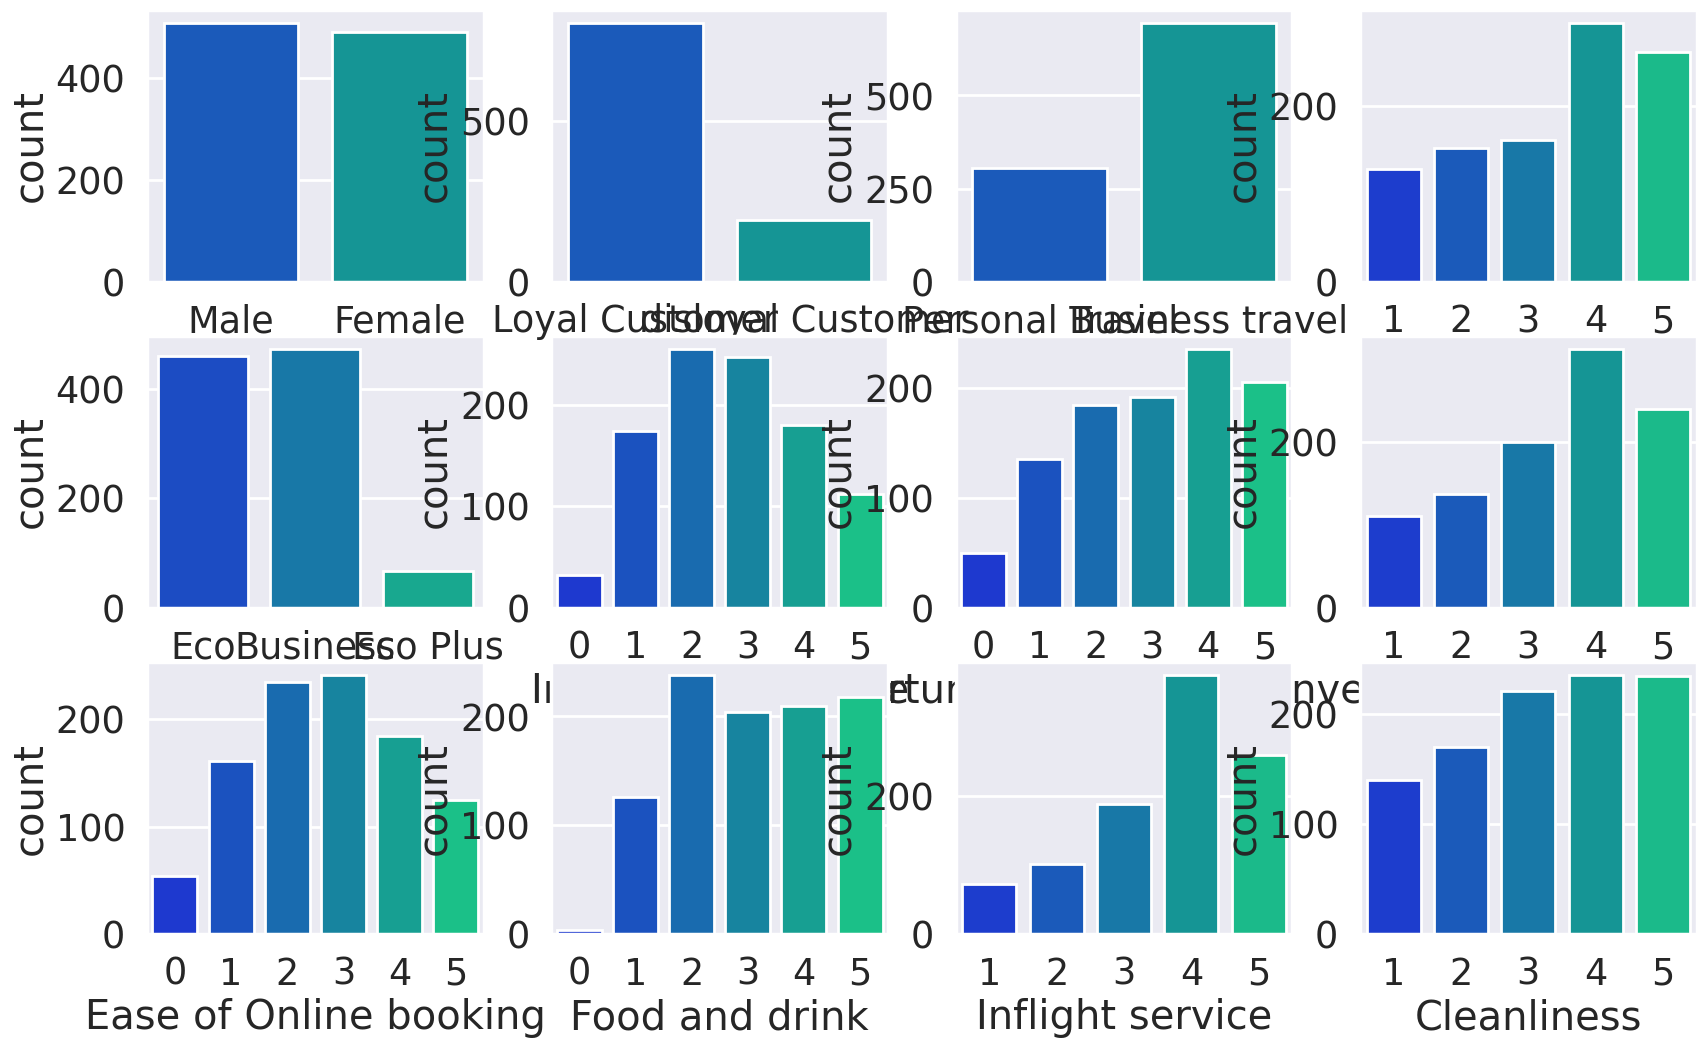

In [ ]:
# 필자의 코드
fig, axes = plt.subplots(3, 4, figsize = (20, 12))
sns.countplot(x = 'Gender', data = sample_data, palette= 'winter', ax = axes[0, 0]);
sns.countplot(x = 'Customer Type', data = sample_data, palette= 'winter', ax = axes[0, 1]);
sns.countplot(x = 'Type of Travel', data = sample_data, palette= 'winter', ax = axes[0, 2]);
sns.countplot(x = 'Seat comfort', data = sample_data, palette= 'winter', ax = axes[0, 3]);
sns.countplot(x = 'Class', data = sample_data, palette= 'winter', ax = axes[1, 0]);
sns.countplot(x = 'Inflight wifi service', data = sample_data, palette= 'winter', ax = axes[1, 1]);
sns.countplot(x = 'Departure/Arrival time convenient', data = sample_data, palette= 'winter', ax = axes[1, 2]);
sns.countplot(x = 'On-board service', data = sample_data, palette= 'winter', ax = axes[1, 3]);
sns.countplot(x = 'Ease of Online booking', data = sample_data, palette= 'winter', ax = axes[2, 0]);
sns.countplot(x = 'Food and drink', data = sample_data, palette= 'winter', ax = axes[2, 1]);
sns.countplot(x = 'Inflight service', data = sample_data, palette= 'winter', ax = axes[2, 2]);
sns.countplot(x = 'Cleanliness', data = sample_data, palette= 'winter', ax = axes[2, 3]);


<ipython-input-51-0fd47416011f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=sample_data, palette='winter', ax=axes[i])
<ipython-input-51-0fd47416011f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=sample_data, palette='winter', ax=axes[i])
<ipython-input-51-0fd47416011f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=sample_data, palette='winter', ax=axes[i])
<ipython-input-51-0fd47416011f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0

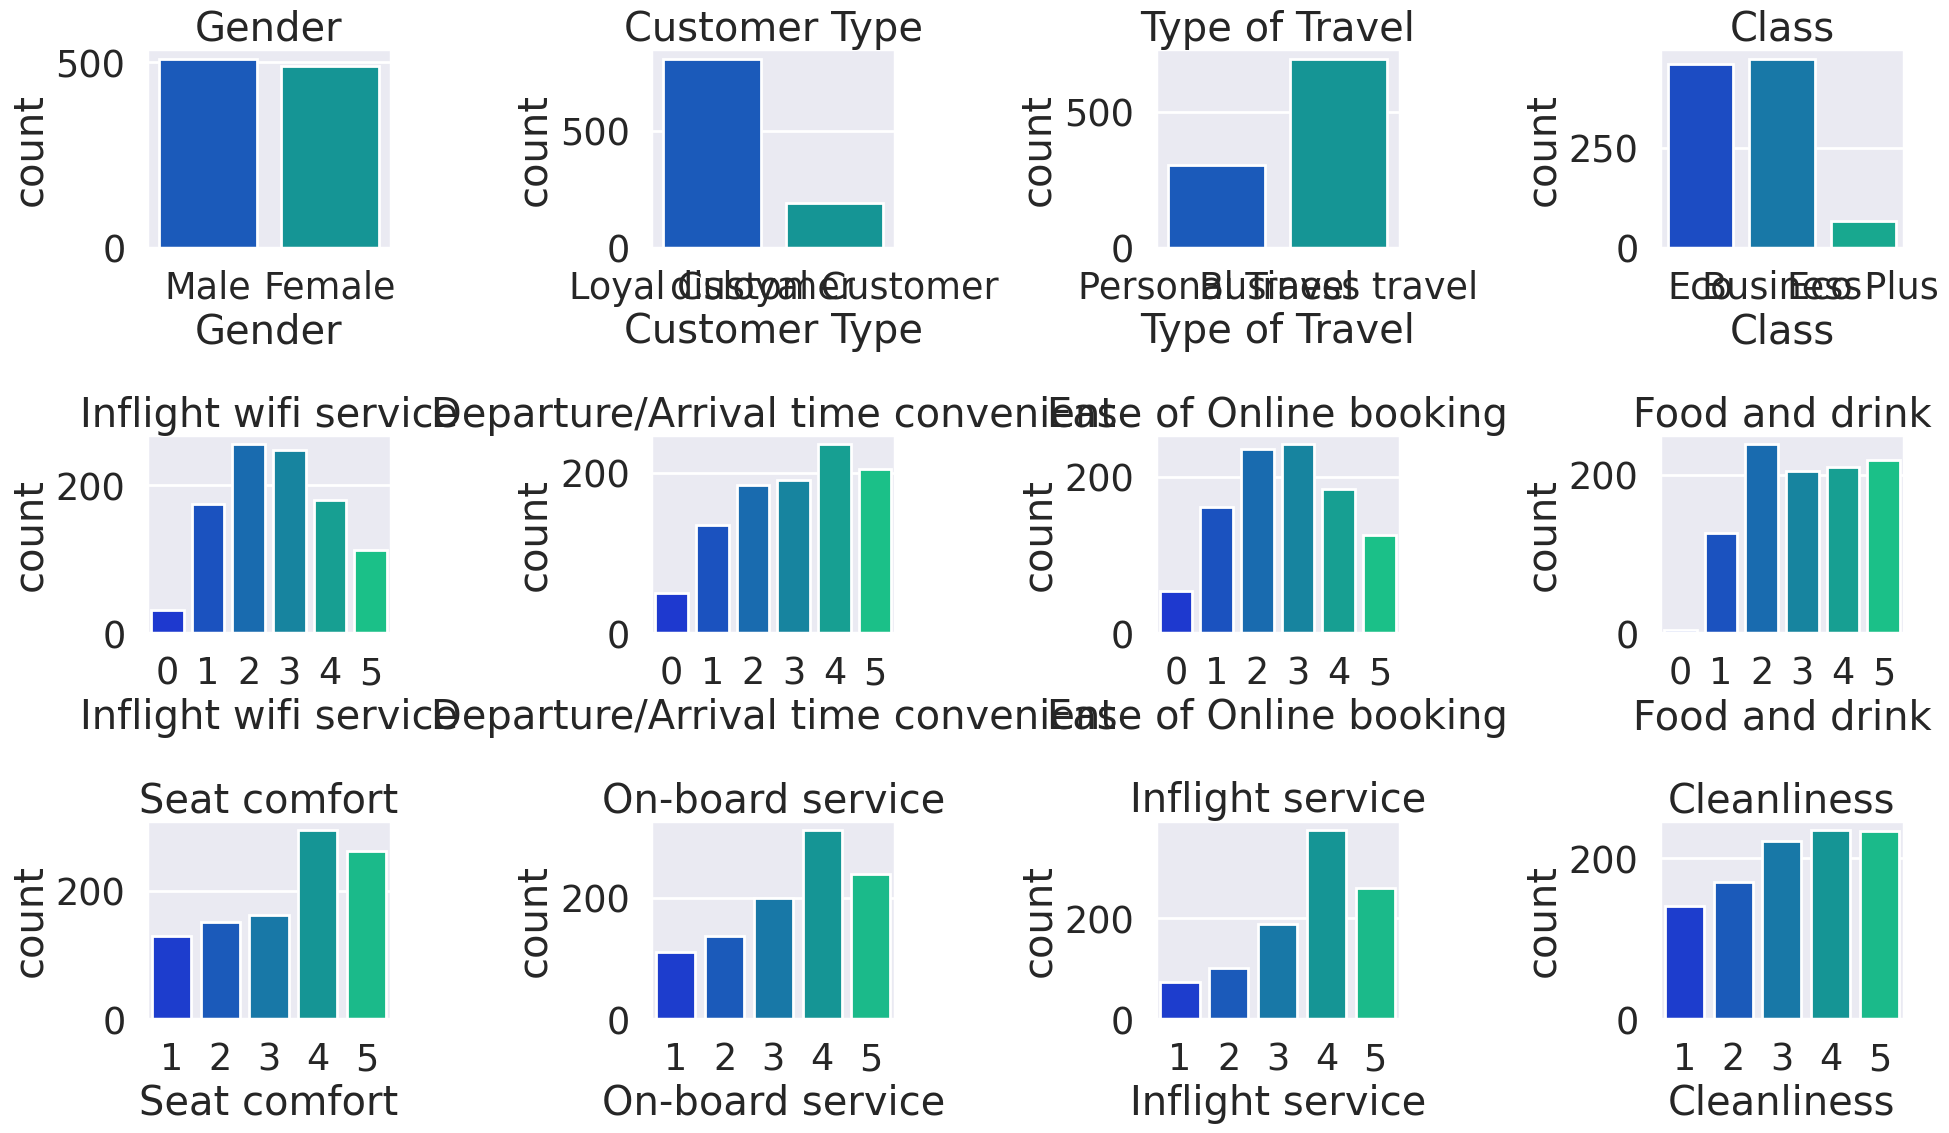

In [ ]:
# 내 코드
exclude = ['Gate location', 'Online boarding', 'Inflight entertainment', 'Leg room service', 'Baggage handling', 'Checkin service', 'satisfaction']
plot_cols = [col for col in cat_columns if col not in exclude]

fig, axes = plt.subplots(3, 4, figsize=(20, 12))
axes = axes.flatten()

for i, col in enumerate(plot_cols):
    sns.countplot(x=col, data=sample_data, palette='winter', ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()


```
필자 曰
- Food and Drink facilities have almost equal number of 2, 3, 4 and 5 ratings.
- Wifi and Ease of Online Booking have recieved 2 out of 5 majority of the times
```

## Bivariate Analysis

> `sample_data.corr()`로 하면 오류가 생김! WHY?
>
>원래 .corr() 는 object type 변수는 거르고 자동으로 숫자형 변수만 뽑아줌.
>
>*단, 하나의 object 변수에 숫자와 문자가 섞여있다면 오류가 생김*
>
>**따라서 안전하게 이미 나누어놓은 num_columns를 이용해 시각화하는게 좋음**

<Axes: >

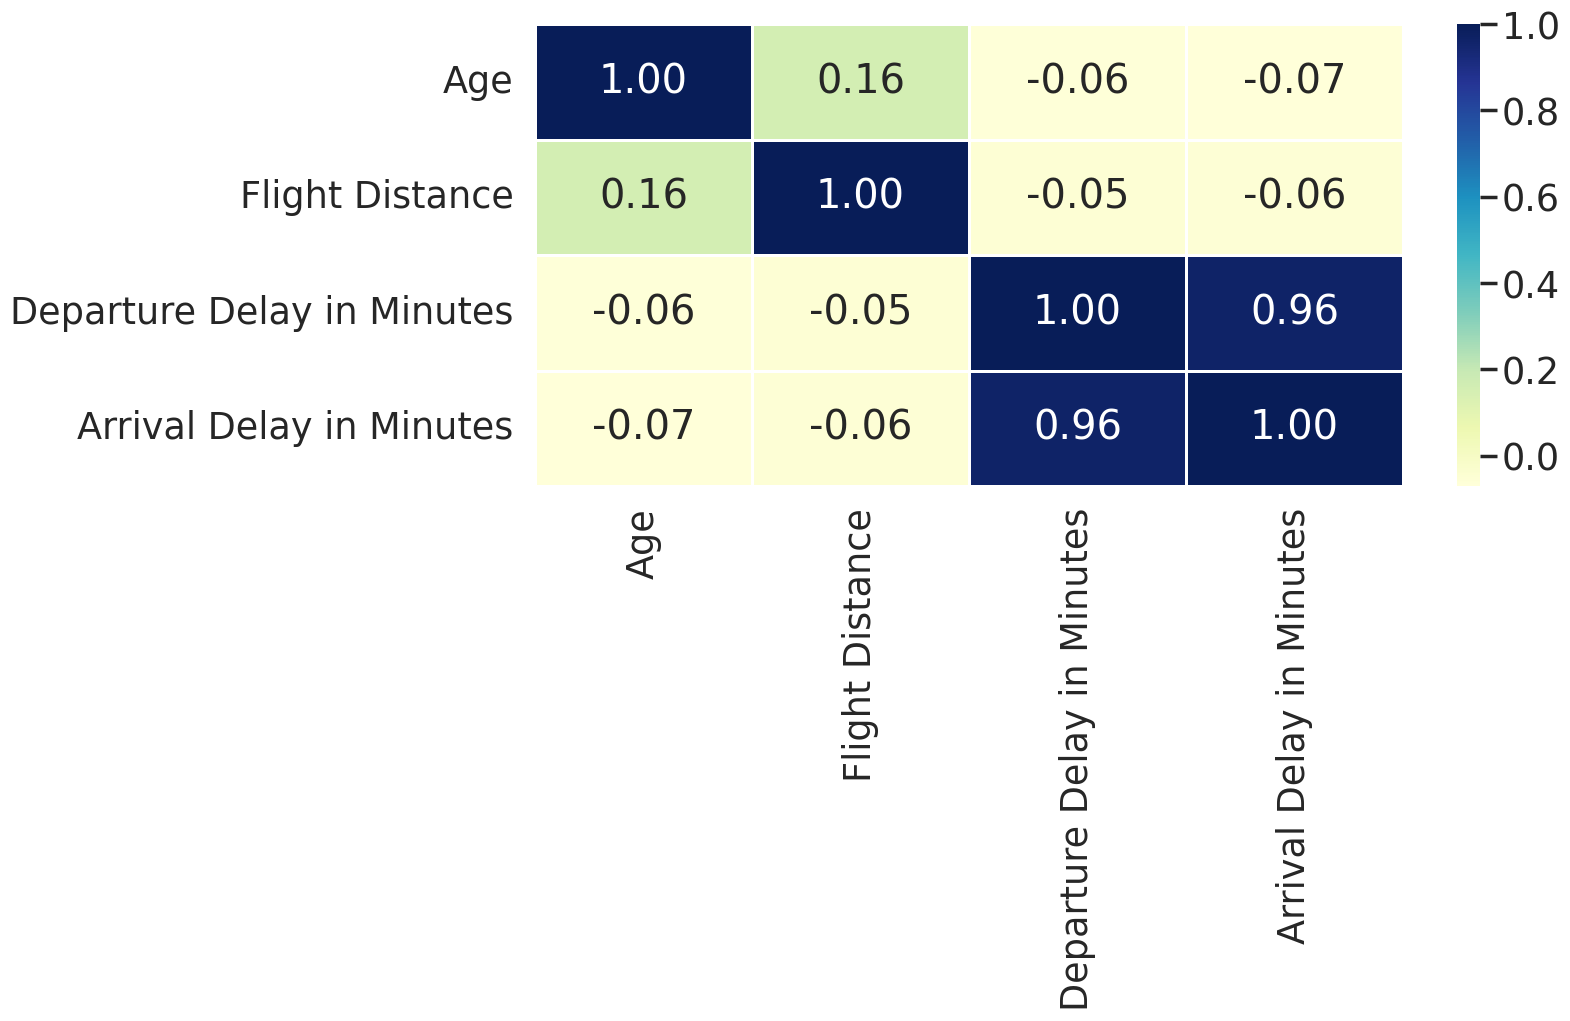

In [ ]:
with sns.axes_style('white'):
    plt.figure(figsize= (14, 6))
sns.heatmap(sample_data[num_columns].corr(), annot=True, fmt='.2f', linewidths=0.8, cmap='YlGnBu')


```
필자 曰
Departure Delay and Arrival delay are heavily correlated with each other, therefore one of them should be dropped(다중공산성)
```

## `color` vs `hue` vs `palette`
| 옵션     | 역할                                 | 사용 위치                        | 예시                                                |
|----------|--------------------------------------|----------------------------------|-----------------------------------------------------|
| `color`  | **하나의 고정 색상** 지정            | 하나의 그래프 전체에             | `color='skyblue'`                                  |
| `hue`    | **데이터에 따라 색을 다르게 적용**   | 범주형 변수 기준으로 그룹 나눌 때 | `hue='Gender'`                                      |
| `palette`| **hue에 의해 나뉜 그룹에 색상을 지정**| `hue`가 있을 때 함께 사용         | `palette='Set2'`, `palette={'Male':'blue', 'Female':'pink'}` |

> hue와 palette는 항상 같이 써야하는가?
일반적으로 그렇지만, x축 자체에 여러 범주가 있으면 hue 없이도 범주별로 palette 적용됨

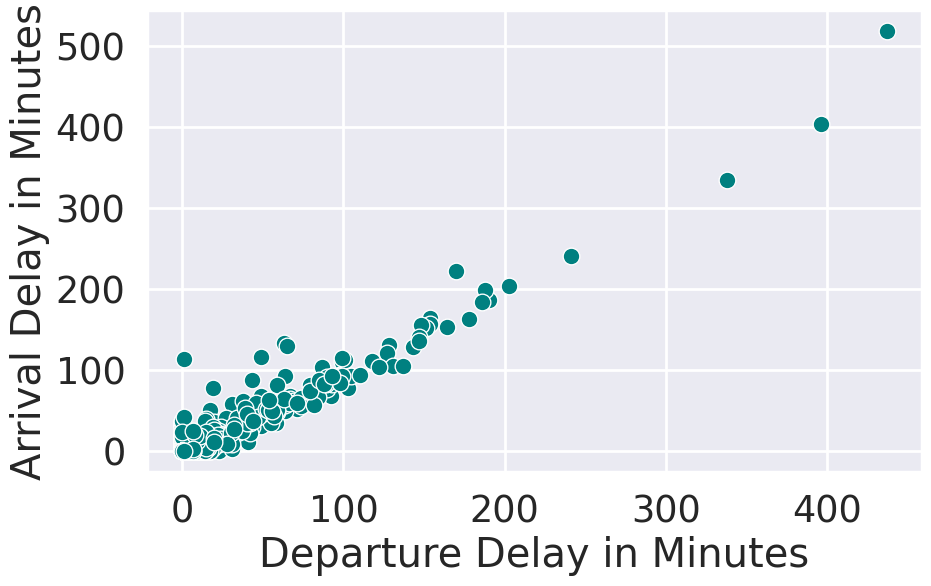

In [ ]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Departure Delay in Minutes', y = 'Arrival Delay in Minutes', data = sample_data, color = 'teal')
plt.show()

## 시각화 이후 변수 drop
다수의 depature delay 데이터가 delay가 없는것으로 나와 drop한 것으로 추측
```
왜 arrival delay 변수는 drop 안하지? 똑같이 delay 없는게 대부분인데
```

In [ ]:
data.drop('Depature Delay in Minutes', axis = 1, inplace = True)
test_data.drop('Depature Delay in Minutes', axis = 1, inplace = True)

KeyError: "['Depature Delay in Minutes'] not found in axis"

## 시각화 중 for문 사용 여부(2)
> 필자 코드 : 각 [행, 열]에 변수 지정해서 시각화. 전부 적음. legend 또한 전부 표기

> 내 코드 : 그래프별로 legned가 동일해서 한 번에 상단 중앙에 표기(for문으로 반복은 (1) 코드와 동일)
- `handles, labels = ...` : 범례에 들어갈 항목 추출
- `fig.legend(...)` : 전체 figure 단위에 legend 배치
- `loc='upper center'` : 맨 위 중앙의 배치
- `ncol=2` : 항목 2개니까 가로로 나란히
- `tight_layout(rect=...) : 위쪽에 legend 배치할 자리 확보
- cf) enmerate()는 인덱스와 값을 동시에 꺼내주는 함수

### 필자 코드 vs 내 코드(언제 무엇을 사용?)
(1) 모두 포함. 그 외만 적음
```
legend가 변수 그래프별로 다르다!
```
**=> 필자 코드**
```
legend가 모든 변수 그래프에 대해서 동일하다!

```
**=> 지민 코드**
>
>*단, `plt.tight_layout()` 은 두 상황 모두 적용하는게 좋을 것으로 보임(가독성이 미세하게 좋아짐)*

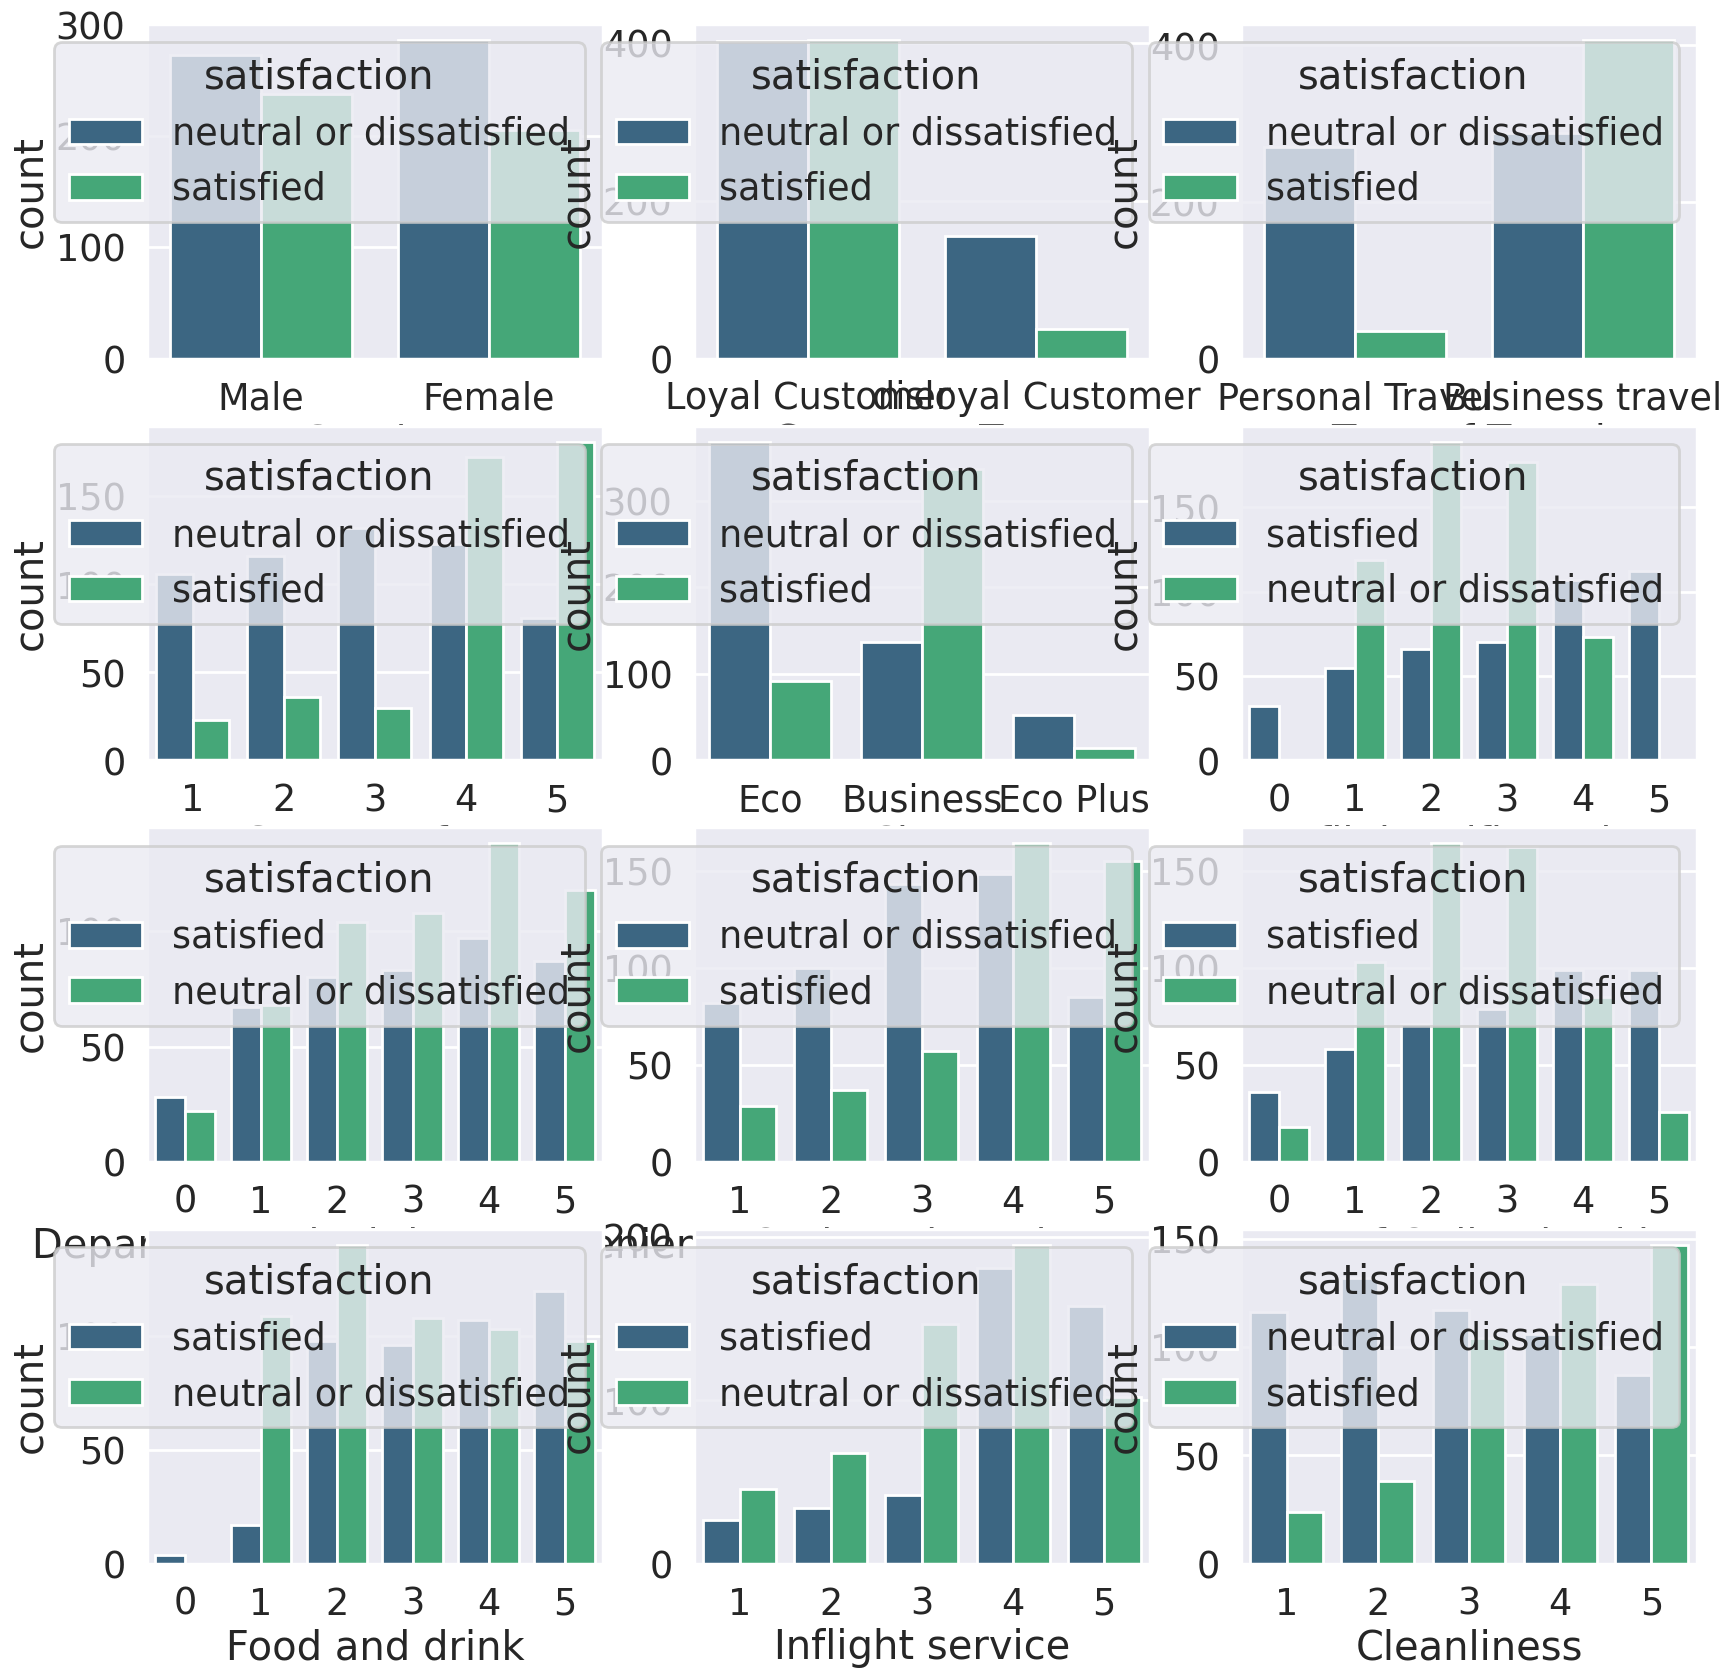

In [ ]:
# 필자 코드
fig, axes = plt.subplots(4, 3, figsize = (20, 20))
sns.countplot(x = 'Gender', data = sample_data, hue= 'satisfaction', palette= 'viridis', ax = axes[0, 0]);
sns.countplot(x = 'Customer Type', data = sample_data, hue= 'satisfaction',  palette= 'viridis', ax = axes[0, 1]);
sns.countplot(x = 'Type of Travel', data = sample_data, hue= 'satisfaction',  palette= 'viridis', ax = axes[0, 2]);
sns.countplot(x = 'Seat comfort', data = sample_data, hue= 'satisfaction',  palette= 'viridis', ax = axes[1, 0]);
sns.countplot(x = 'Class', data = sample_data, hue= 'satisfaction',  palette= 'viridis', ax = axes[1, 1]);
sns.countplot(x = 'Inflight wifi service', data = sample_data, hue= 'satisfaction',  palette= 'viridis', ax = axes[1, 2]);
sns.countplot(x = 'Departure/Arrival time convenient', data = sample_data, hue= 'satisfaction',  palette= 'viridis', ax = axes[2, 0]);
sns.countplot(x = 'On-board service', data = sample_data, hue= 'satisfaction',  palette= 'viridis', ax = axes[2, 1]);
sns.countplot(x = 'Ease of Online booking', data = sample_data, hue= 'satisfaction',  palette= 'viridis', ax = axes[2, 2]);
sns.countplot(x = 'Food and drink', data = sample_data, hue= 'satisfaction',  palette= 'viridis', ax = axes[3, 0]);
sns.countplot(x = 'Inflight service', data = sample_data, hue= 'satisfaction',  palette= 'viridis', ax = axes[3,  1]);
sns.countplot(x = 'Cleanliness', data = sample_data, hue= 'satisfaction',  palette= 'viridis', ax = axes[3, 2]);

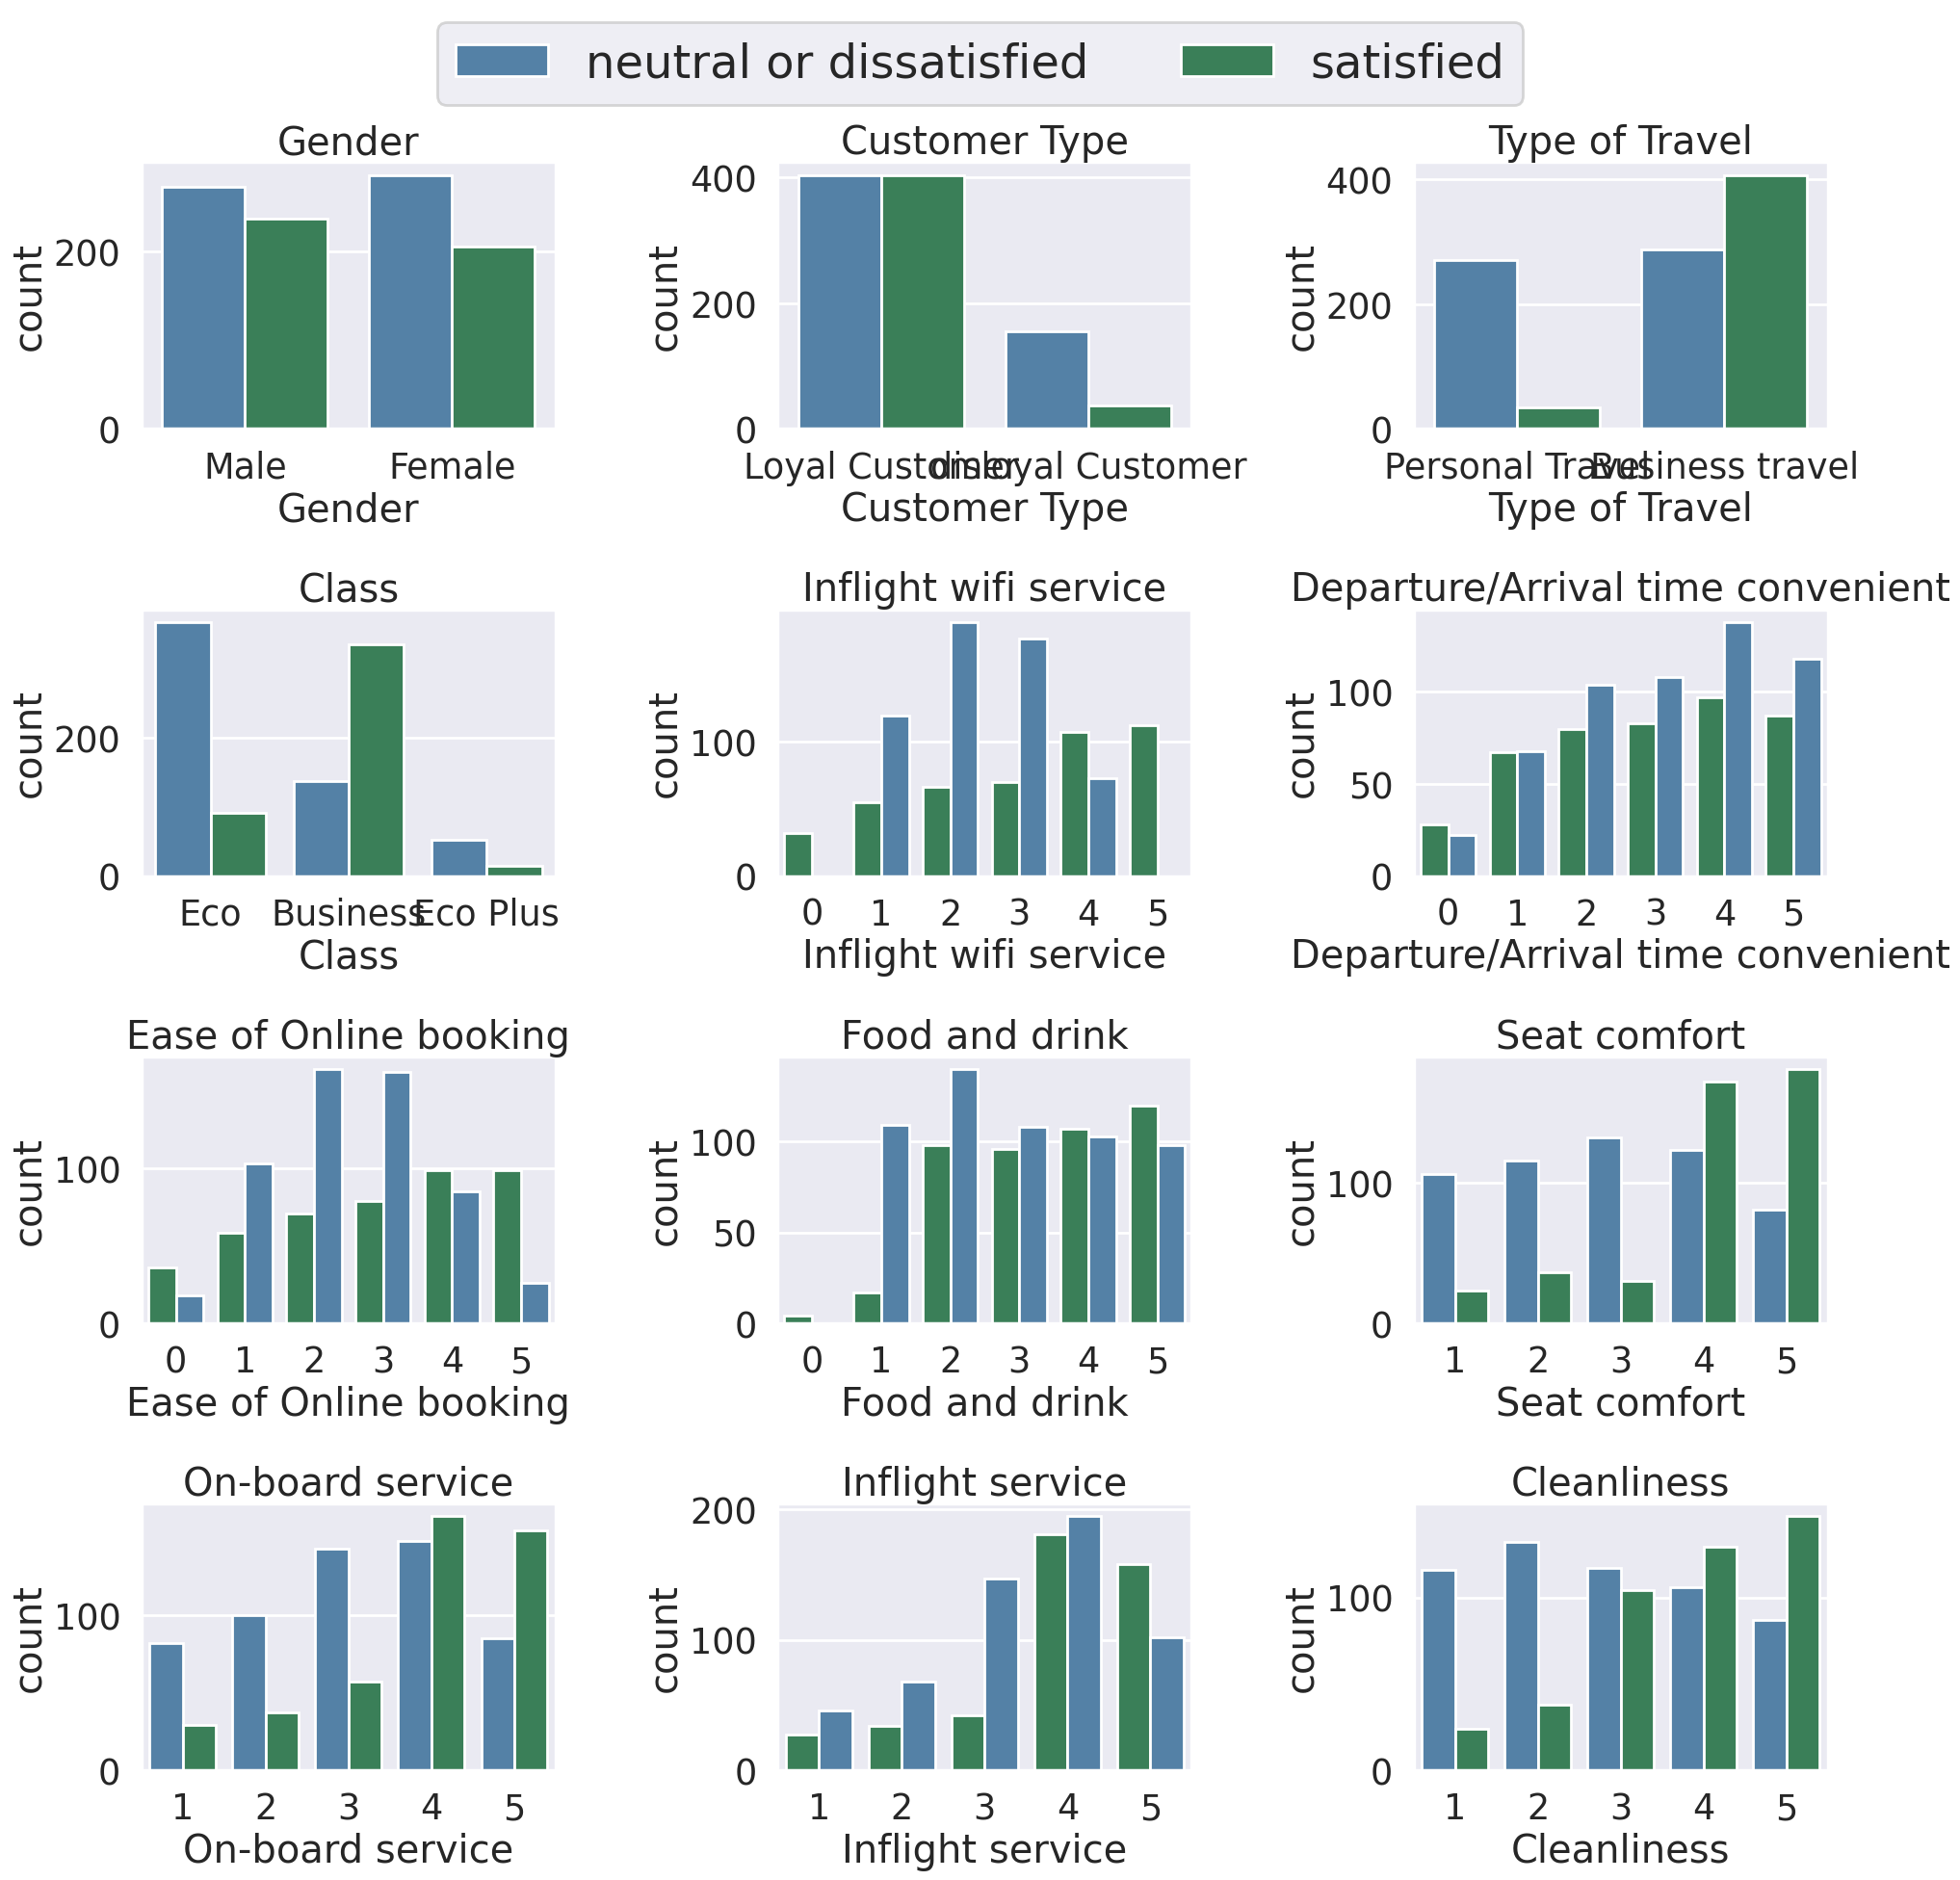

In [ ]:
satisfaction_palette = {
    'neutral or dissatisfied': 'steelblue',
    'satisfied': 'seagreen'
}

plot_cols = [col for col in cat_columns if col not in exclude]

fig, axes = plt.subplots(4, 3, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(plot_cols):
    sns.countplot(
        x=col,
        data=sample_data,
        hue='satisfaction',
        palette=satisfaction_palette,
        ax=axes[i]
    )
    axes[i].set_title(col)
    if i == 0:
        handles, labels = axes[i].get_legend_handles_labels()
    axes[i].get_legend().remove()

fig.legend(handles, labels, loc='upper center', ncol=2, fontsize='large')

plt.tight_layout(rect=[0, 0, 1, 0.95])

```
필자 曰
- People travelling for business are more satisfied as compared to people who are travelling for other purposes.
- Business class people are more satisfied as compared to people travelling in eco class
- Majority of people who gave 4 or 5 rating in any of the category were generally satisfied with the airline.
```

# Data Cleaning

## Filling Missing values

In [ ]:
data.isnull().sum()

,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0
Gate location,0


> 왜 중앙값으로 채웠나?
arrival delay가 매우 치우친 데이터였기 때문

In [ ]:
median_val = data['Arrival Delay in Minutes'].median()
data['Arrival Delay in Minutes'].fillna(median_val, inplace = True)
test_data['Arrival Delay in Minutes'].fillna(median_val, inplace = True)

<ipython-input-58-85c7ddff50ae>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Arrival Delay in Minutes'].fillna(median_val, inplace = True)
<ipython-input-58-85c7ddff50ae>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [ ]:
data[cat_columns].nunique() #고유값 세기

,0
Gender,2
Customer Type,2
Type of Travel,2
Class,3
Inflight wifi service,6
Departure/Arrival time convenient,6
Ease of Online booking,6
Gate location,6
Food and drink,6
Online boarding,6


```
필자 曰
Some of the missing values in categorical columns are represented by 0, lets replace them with mode of that particular column
```

**왜 여기서는 inplace = True 못하는가?**
> 슬라이싱된 dataframe의 복사본에 inplace=True는 영향을 못 미침.
> 즉, **원본 전체 대상일때만** 가능

그러면 `data['Arrival Delay in Minutes'].fillna(median_val, inplace = True)` 이건 왜 가능??
> **오직 하나의 변수**를 대상으로 replace할 경우에는 예외적으로 inplace=True를 이용해서 원본에 저장 가능!

In [ ]:
columns_containing_0 = data[cat_columns].nunique()[data[cat_columns].nunique() == 6].index.tolist()
modes = data[columns_containing_0].mode()
data[columns_containing_0] = data[columns_containing_0].replace({'0':modes})
test_data[columns_containing_0] = test_data[columns_containing_0].replace({'0':modes})

## Feature Transformation
Lot of features were skewed, therefore it will be appropriate to apply log transformation to them

> `log(x)` : 데이터에 0이 없을 때 사용
>
> `log1p(x)` = log(1+x) : 데이터에 0이 있을 경우 log0이 정의가 안되기 때문에 사용

```
왜 train data에는 arrival delay log 변환 안해주는데??
```

In [ ]:
data['Flight Distance'] = np.log1p(data['Flight Distance'])
data['Arrival Delay in Minutes'] = np.log1p(data['Arrival Delay in Minutes'])
test_data['Flight Distance'] = np.log1p(test_data['Flight Distance'])
test_data['Arrival Delay in Minutes'] = np.log1p(test_data['Arrival Delay in Minutes'])

## Encoding

In [ ]:
data['Gender'] = data['Gender'].map({'Male' : 0, 'Female' : 1})
data['Customer Type'] = data['Customer Type'].map({'Loyal Customer' : 0, 'disloyal Customer' : 1})
data['Type of Travel'] = data['Type of Travel'].map({'Personal Travel' : 0, 'Business travel' : 1})
data['Class'] = data['Class'].map({'Business' : 2, 'Eco Plus' : 1, 'Eco' : 0})
data['satisfaction'] = data['satisfaction'].map({'neutral or dissatisfied' : 0, 'satisfied' : 1})


test_data['Gender'] = test_data['Gender'].map({'Male' : 0, 'Female' : 1})
test_data['Customer Type'] = test_data['Customer Type'].map({'Loyal Customer' : 0, 'disloyal Customer' : 1})
test_data['Type of Travel'] = test_data['Type of Travel'].map({'Personal Travel' : 0, 'Business travel' : 1})
test_data['Class'] = test_data['Class'].map({'Business' : 2, 'Eco Plus' : 1, 'Eco' : 0})
test_data['satisfaction'] = test_data['satisfaction'].map({'neutral or dissatisfied' : 0, 'satisfied' : 1})

## Feature Scaling

In [ ]:
X_train = data.drop('satisfaction', axis = 1)
y_train = data.satisfaction

X_test = test_data.drop('satisfaction', axis=1)
y_test = test_data.satisfaction

> **StandardScaler()**
- sklearn에서 제공하는 클래스
- 평균이 0, 표준편차가 1이 되도록 데이터를 변환해줌(**Z-score 표준화**)
- fit() : 평균과 표준편차 계산
- transform() : ()안의 데이터를 fit을 통해 계산된 평균, 표준편차 기준으로 변환
- fit_transform() 두 개를 한 번에 처리

> 왜 train은 fit_transform하고 test는 그냥 transform?
- test를 기준으로 평균과 표준편차를 계산하면 train과 기준이 달라지는 것임=> **데이터 누설(leakage) 발생**

In [ ]:
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

# K Nearest Neighbors

> **cross_val_score()**
- `scoring='accuracy` : 정확도 기준으로 성능 측정
- `cv=k` : 위에서 정의한 5-Fold 교차검증 사용(cv = cross-validation)
- `.mean()` : 5번의 정확도 결과 평균
>
> 그냥 cv=5여도 5개로 split이 되지만...

| 비교 항목       | `cv=5`                                      | `cv=KFold(n_splits=5)`                                          |
|----------------|----------------------------------------------|-----------------------------------------------------------------|
| 의미           | 기본적인 5-Fold 교차 검증                    | KFold 객체를 직접 생성해 넘겨줌                                |
| 제어 가능성    | 거의 없음                                 |  `shuffle`, `random_state` 등 세부 설정 가능                  |
| 코드 간결성    |  간단하고 빠름                             |  객체 정의 코드가 한 줄 더 필요                              |
| 활용 확장성    |  제한적 (기본 동작만 사용)                 |  다른 폴드 전략(`StratifiedKFold`, `GroupKFold` 등)로 확장 가능 |
| 예시           | `cv=5`                                       | `cv=KFold(n_splits=5, shuffle=True, random_state=42)`           |


> train 과 test의 정확도가 모두 0.926으로 같음! 무슨의미?
1. 과적합이 없을 가능성이 높음
- 보통 모델이 훈련 데이터에만 성능이 높고 테스트에서 낮으면 과적합일 가능성 있음.
- 정확도가 같거나 유사 = **모델이 일반화를 잘하고 있다**는 뜻으로 해석 가능
2. (우연히 같을 수도 있다..)

In [ ]:
# 진짜 k 고르기 전 검증해보는 느낌이어서 해도 되고 안해도됨
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(X_train, y_train)
k = KFold(n_splits = 5)
score = cross_val_score(knn, X_train, y_train, scoring = 'accuracy', cv = k).mean()
print("Accuracy on the training set:", round(score, 3)) #소수점 아래 3번째 자리까지

ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
#test set은 5등분 안하고 한 번만 예측해서 정확도 계
y_pred = knn.predict(X_test)
print("Accuracy on the test set:", round(accuracy_score(y_test, y_pred), 3))

Accuracy on the test set: 0.926


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     14573
           1       0.94      0.89      0.91     11403

    accuracy                           0.93     25976
   macro avg       0.93      0.92      0.92     25976
weighted avg       0.93      0.93      0.93     25976



# Choosing a K value

### scoring 종류
| scoring 이름               | 의미                                                        |
|----------------------------|-------------------------------------------------------------|
| `'accuracy'`               | 정확도 (전체 정답 비율)                                     |
| `'precision'`              | 정밀도 (Positive로 예측한 것 중 실제 Positive 비율)         |
| `'recall'`                 | 재현율 (실제 Positive 중 맞힌 비율)                         |
| `'f1'`                     | F1 점수 (precision과 recall의 조화 평균)                    |
| `'roc_auc'`                | ROC AUC (이진 분류 확률 기반 평가지표)                      |
| `'neg_log_loss'`          | 로그 손실 (작을수록 좋음, 값은 음수로 나옴)                |
| `'neg_mean_squared_error'`| 회귀용: 평균 제곱 오차 (작을수록 좋음, 값은 음수로 나옴)    |

**scoring 바로 적용 가능한 함수**


| 함수 이름               | 의미                                                        |
|--------------------------|-------------------------------------------------------------|
| `accuracy_score(y, y_pred)` | 정확도 (정답 비율)                                     |
| `precision_score(y, y_pred)`| 정밀도                                                  |
| `recall_score(y, y_pred)`   | 재현율                                                  |
| `f1_score(y, y_pred)`       | F1 점수                                                 |
| `roc_auc_score(y, y_prob)`  | ROC AUC 점수 (확률 예측 필요)                         |
| `log_loss(y, y_prob)`       | 로그 손실 (확률 예측 필요)                           |


In [ ]:
accuracy = []
for i in range(1,15):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    accuracy_i = accuracy_score(y_test, pred_i)
    accuracy.append(accuracy_i)

### k 크기에 따른 해석
>**k가 작을수록***
- 장점 : 민감하고 빠르게 반응, 국지적 패턴 잘 포착
- 단점 : 과적합 위험 있음, 노이즈에 민감

>**k가 클수록**
- 장점 : 더 안정적이고 일반화 잘 됨, 노이즈에 덜 민감함
- 단점 : 과소적합 가능, 멀리 떨어진 포인트까지 포함되어서 구분이 흐려짐

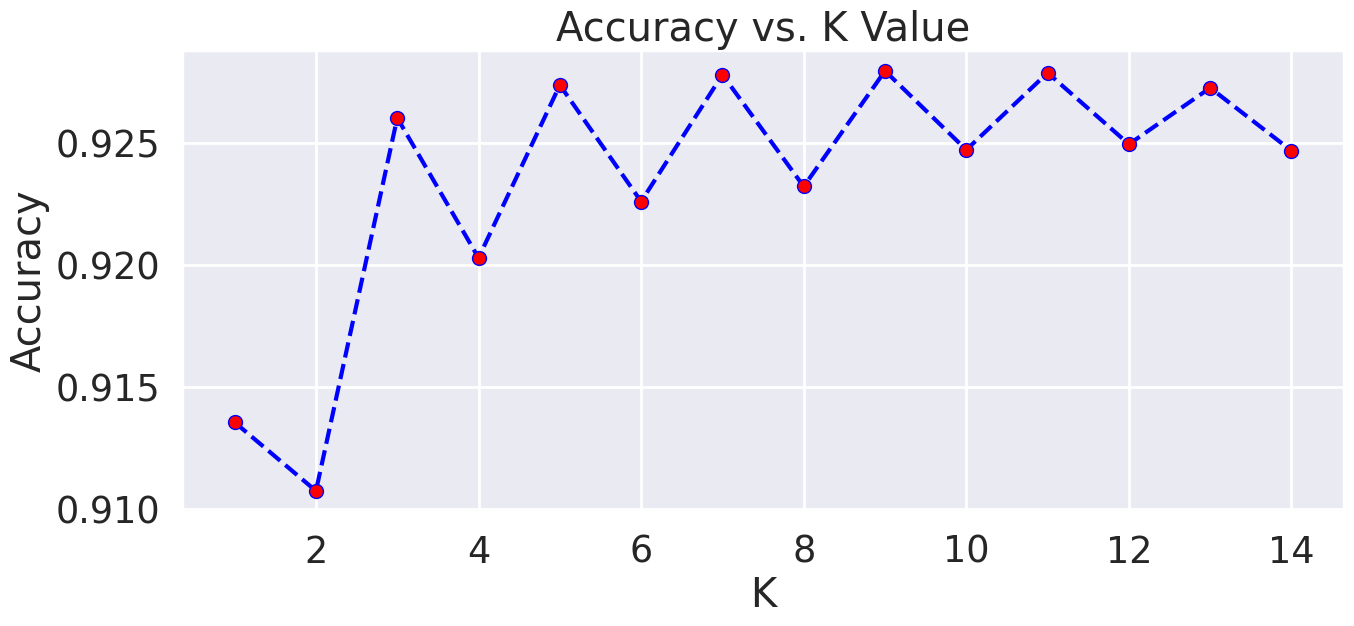

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(range(1,15, 1), accuracy, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

```
필자 曰
Maximum accuracy occurs when k = 5, lets re train our model for k = 5
단, 내 결과는 k=9가 최적의 k
```

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluation

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {round(accuracy * 100, 2)}%")

Accuracy: 92.79%


###  Confusion Matrix -> Classification Report

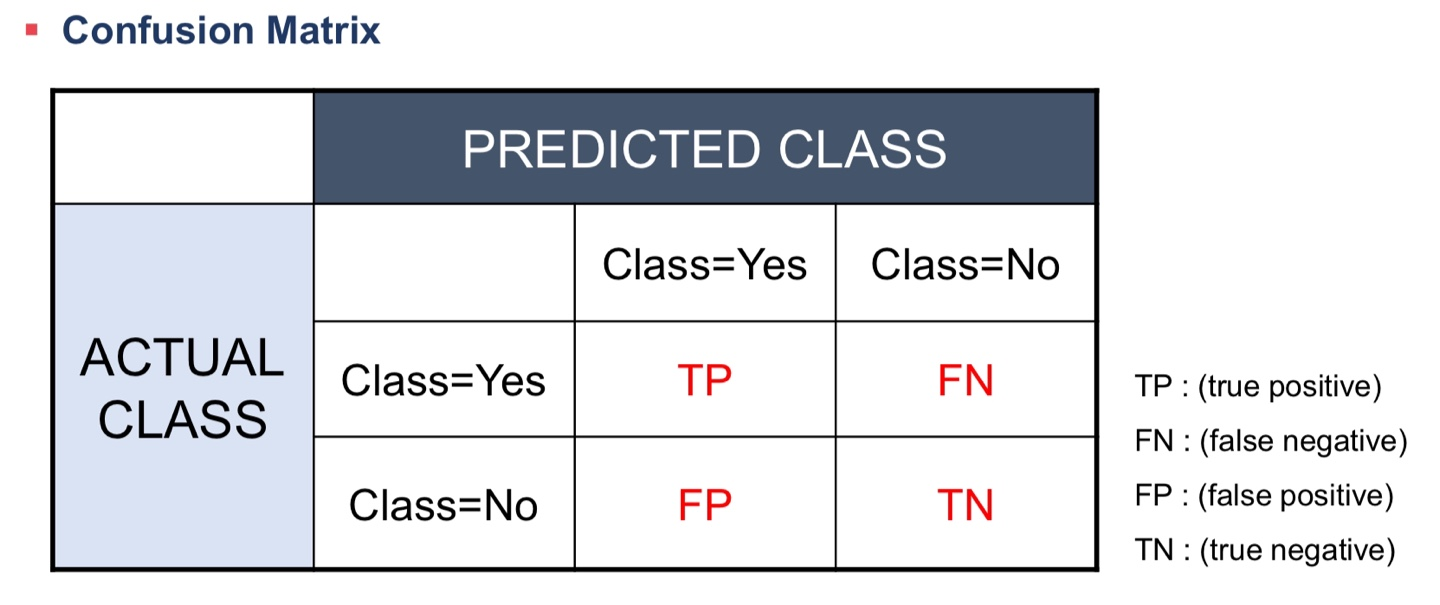

>- `Accuracy` = (TP + TN) / (P + N)
- `Precision` = TP / P
- `Recall(Sensitivity)` = TP / (TP + FN)
- `F1 score` = 2/(1/Recall + 1/Precision)

>- `Type 1 error(FP rate)` = FP / N
- `Type 2 error(FN rate)` = FN / P


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     14573
           1       0.95      0.88      0.91     11403

    accuracy                           0.93     25976
   macro avg       0.93      0.92      0.93     25976
weighted avg       0.93      0.93      0.93     25976



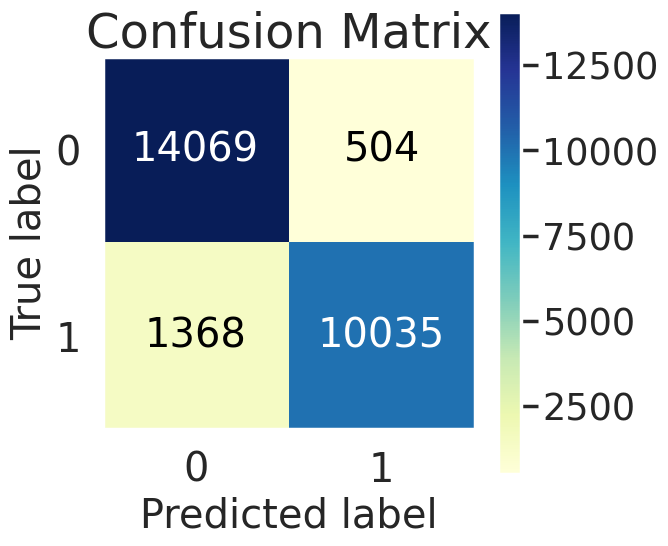

In [ ]:
scikitplot.metrics.plot_confusion_matrix(y_test, y_pred, figsize=(6,6), cmap= 'YlGnBu');

**여기부터 내 코드**

필자의 코드에 비해서 좋은점

1. Test 데이터 안 건드림 -> 데이터 누설이 없음

2. 교차 검증으로 안전성 확보

3. 하이퍼파라미터 튜닝 최적(test로 튜닝할 시 1의 문제 발생. train 데이터로 튜닝해야함)

In [ ]:
accuracy = []
for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    accuracy.append(score.mean())

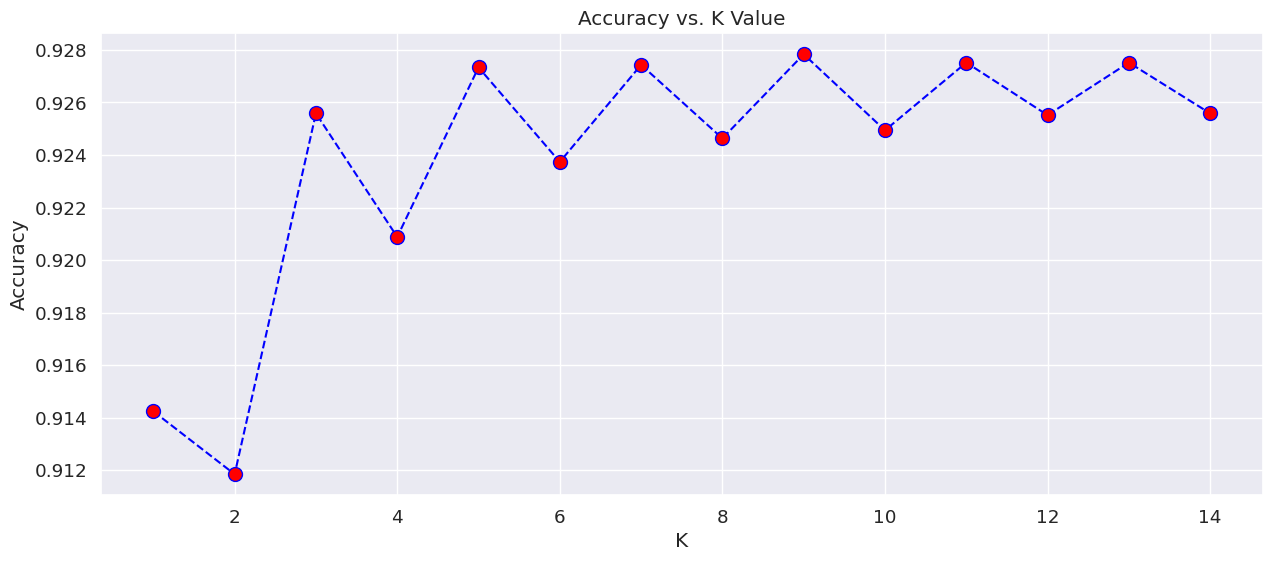

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(range(1,15, 1), accuracy, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {round(accuracy * 100, 2)}%")

Accuracy: 92.93%


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     14573
           1       0.95      0.89      0.92     11403

    accuracy                           0.93     25976
   macro avg       0.93      0.92      0.93     25976
weighted avg       0.93      0.93      0.93     25976

